## Machine learning model for predicting Hepatitis B virus among HIV infected individuals in Uganda.
This study will use routinely collected clinical and laboratory data.This data is got from the JCRC EMR systems.(ICEA and LIMS)

## Importing the necessary libraries

In [4]:
#import necessaries libraries
import pandas as pd #For handling tabular data
import numpy as np #For numerical computations
import matplotlib.pyplot as plt #For basic plots
import seaborn as sns #For statistical visualizations
import missingno as msno
from scipy.stats import pointbiserialr
from scipy import stats  #For statistical tests
from sklearn.impute import SimpleImputer





## Load of the dataset.
### Loading the dataset from csv file

In [5]:
# Load your dataset
df = pd.read_csv("finalHepBprediction.csv")
df
print(df.head())

C:\Users\jnabateesa\AppData\Local\Temp\ipykernel_12468\59587683.py:2: DtypeWarning: Columns (0,1,4,15,16,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("finalHepBprediction.csv")


    District Sex   Age  ART_Duration         Regimen   WBC   HGB   HCT    PLT  \
0  Rukungiri   M  60.0        3066.0  DTG/ATVr-based  1.10   7.8  22.4   81.0   
1     Wakiso   F  45.0        3436.0       DTG-based  1.80  12.1  34.6  251.0   
2    Mbarara   M  68.0         271.0       DTG-based  1.92  10.3  31.3  118.0   
3    Kampala   F  46.0        2098.0       DTG-based  2.00  11.9  34.6   84.0   
4    Kampala   F  55.0        1092.0       DTG-based  2.00  11.8  35.5  144.0   

    MCH  ...   ALB  V-LOAD  CD4    ALP    AST    ALT   GGT    NA+    K+  \
0  32.4  ...  3.74    4340   79   60.4   45.2   24.5   NaN  114.8  4.93   
1  26.6  ...  4.38      40    3   91.9  114.5  123.4   NaN    NaN   NaN   
2  27.6  ...  3.60  118698   58   82.1   30.4   13.2  18.2  129.8  3.98   
3  30.9  ...  3.56  555000  153  108.6   25.9   15.5   NaN  131.3  4.92   
4  30.0  ...   NaN      50  493    NaN   24.1   22.4   NaN    NaN   NaN   

   HBsAg_Status  
0           0.0  
1           0.0  
2       

## Showing basic information about the dataset


In [6]:
# show  basic information
df.info

<bound method DataFrame.info of           District  Sex   Age  ART_Duration         Regimen   WBC   HGB   HCT  \
0        Rukungiri    M  60.0        3066.0  DTG/ATVr-based  1.10   7.8  22.4   
1           Wakiso    F  45.0        3436.0       DTG-based  1.80  12.1  34.6   
2          Mbarara    M  68.0         271.0       DTG-based  1.92  10.3  31.3   
3          Kampala    F  46.0        2098.0       DTG-based  2.00  11.9  34.6   
4          Kampala    F  55.0        1092.0       DTG-based  2.00  11.8  35.5   
...            ...  ...   ...           ...             ...   ...   ...   ...   
1044592        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN   
1044593        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN   
1044594        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN   
1044595        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN   
1044596        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN

## Summary Statistics for Numerical Features

In [7]:
# Show summary statistics 
print(df.describe())

              Age  ART_Duration         WBC         HGB         HCT  \
count  746.000000    746.000000  685.000000  681.000000  685.000000   
mean    31.345845   2967.454424    5.952657   12.751836   38.683212   
std     16.984982   1901.131766    3.459031    2.190541   13.963612   
min      1.000000     81.000000    1.100000    4.700000   13.100000   
25%     18.000000   1567.250000    4.100000   11.500000   34.600000   
50%     29.000000   2666.000000    5.100000   12.900000   38.400000   
75%     44.000000   3764.000000    6.900000   14.200000   42.300000   
max     81.000000   9814.000000   44.500000   19.400000  366.100000   

              PLT         MCH        MCHC         MVC         NE#  ...  \
count  685.000000  685.000000  685.000000  685.000000  685.000000  ...   
mean   300.610803   28.765168   33.383942   85.924058    2.437839  ...   
std    120.594963    4.779855    1.960272   11.866636    1.529368  ...   
min     14.000000    2.040000   27.600000    6.280000    0.22000

## Check the Dimensions of the Dataset.
### This provides a quick overview of the dataset's size and structure, showing the number of rows (observations) and columns (features).'''


In [8]:
#check the dimensions of the data.
print(df.shape)

(1044597, 29)


## Check for Duplicate Records
### This checks for duplicate rows in the dataset. Duplicate rows may occur due to repeated data entry or merging errors and can bias your analysis if not addressed.

In [9]:
#Show number of duplicates before removal
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 1043962


## Removing the duplicate records
#### This removes all duplicate rows from the dataset, retaining only the first occurrence. It's an essential cleaning step to ensure data quality and avoid redundancy.

In [10]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

#  Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Save cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Show results
#print("Duplicates after:", df_cleaned.duplicated().sum())
#print("Cleaned dataset shape:", df_cleaned.shape)

## Loading the cleaned dataset after removing the duplicate records.

In [11]:
#load cleaned copy 
# Load your dataset
df1 = pd.read_csv("cleaned_dataset.csv")
df1
df1.head

<bound method NDFrame.head of       District  Sex   Age  ART_Duration         Regimen   WBC   HGB   HCT  \
0    Rukungiri    M  60.0        3066.0  DTG/ATVr-based  1.10   7.8  22.4   
1       Wakiso    F  45.0        3436.0       DTG-based  1.80  12.1  34.6   
2      Mbarara    M  68.0         271.0       DTG-based  1.92  10.3  31.3   
3      Kampala    F  46.0        2098.0       DTG-based  2.00  11.9  34.6   
4      Kampala    F  55.0        1092.0       DTG-based  2.00  11.8  35.5   
..         ...  ...   ...           ...             ...   ...   ...   ...   
630     Wakiso    M  31.0         314.0         unknown   NaN   NaN   NaN   
631     Wakiso    M  21.0         306.0         unknown   NaN   NaN   NaN   
632     Wakiso    M  31.0         293.0         unknown   NaN   NaN   NaN   
633     Wakiso    M  31.0         195.0         unknown   NaN   NaN   NaN   
634        NaN  NaN   NaN           NaN             NaN   NaN   NaN   NaN   

       PLT   MCH  ...   ALB  V-LOAD  CD4    A

## checking the dimensions of the cleaned data

In [12]:

print(df1.shape)

(635, 29)


## Statistical Summary of the cleaned dataset 

In [13]:
print(df1.describe())

              Age  ART_Duration         WBC         HGB         HCT  \
count  634.000000    634.000000  577.000000  573.000000  577.000000   
mean    30.876972   2957.299685    6.032114   12.716928   38.744194   
std     17.153540   1941.916453    3.572080    2.245145   15.041622   
min      1.000000     81.000000    1.100000    4.700000   13.100000   
25%     18.000000   1473.000000    4.100000   11.400000   34.600000   
50%     28.000000   2603.000000    5.200000   12.900000   38.400000   
75%     43.000000   3998.500000    6.950000   14.200000   42.400000   
max     81.000000   9814.000000   44.500000   19.400000  366.100000   

              PLT         MCH        MCHC         MVC         NE#  ...  \
count  577.000000  577.000000  577.000000  577.000000  577.000000  ...   
mean   298.908492   28.662981   33.308319   85.814350    2.445685  ...   
std    121.267933    4.700165    1.728479   11.882009    1.550916  ...   
min     14.000000    2.040000   27.600000    6.280000    0.22000

## Checking the missingness level of the cleaned dataset.
### It helps detect patterns of data loss.

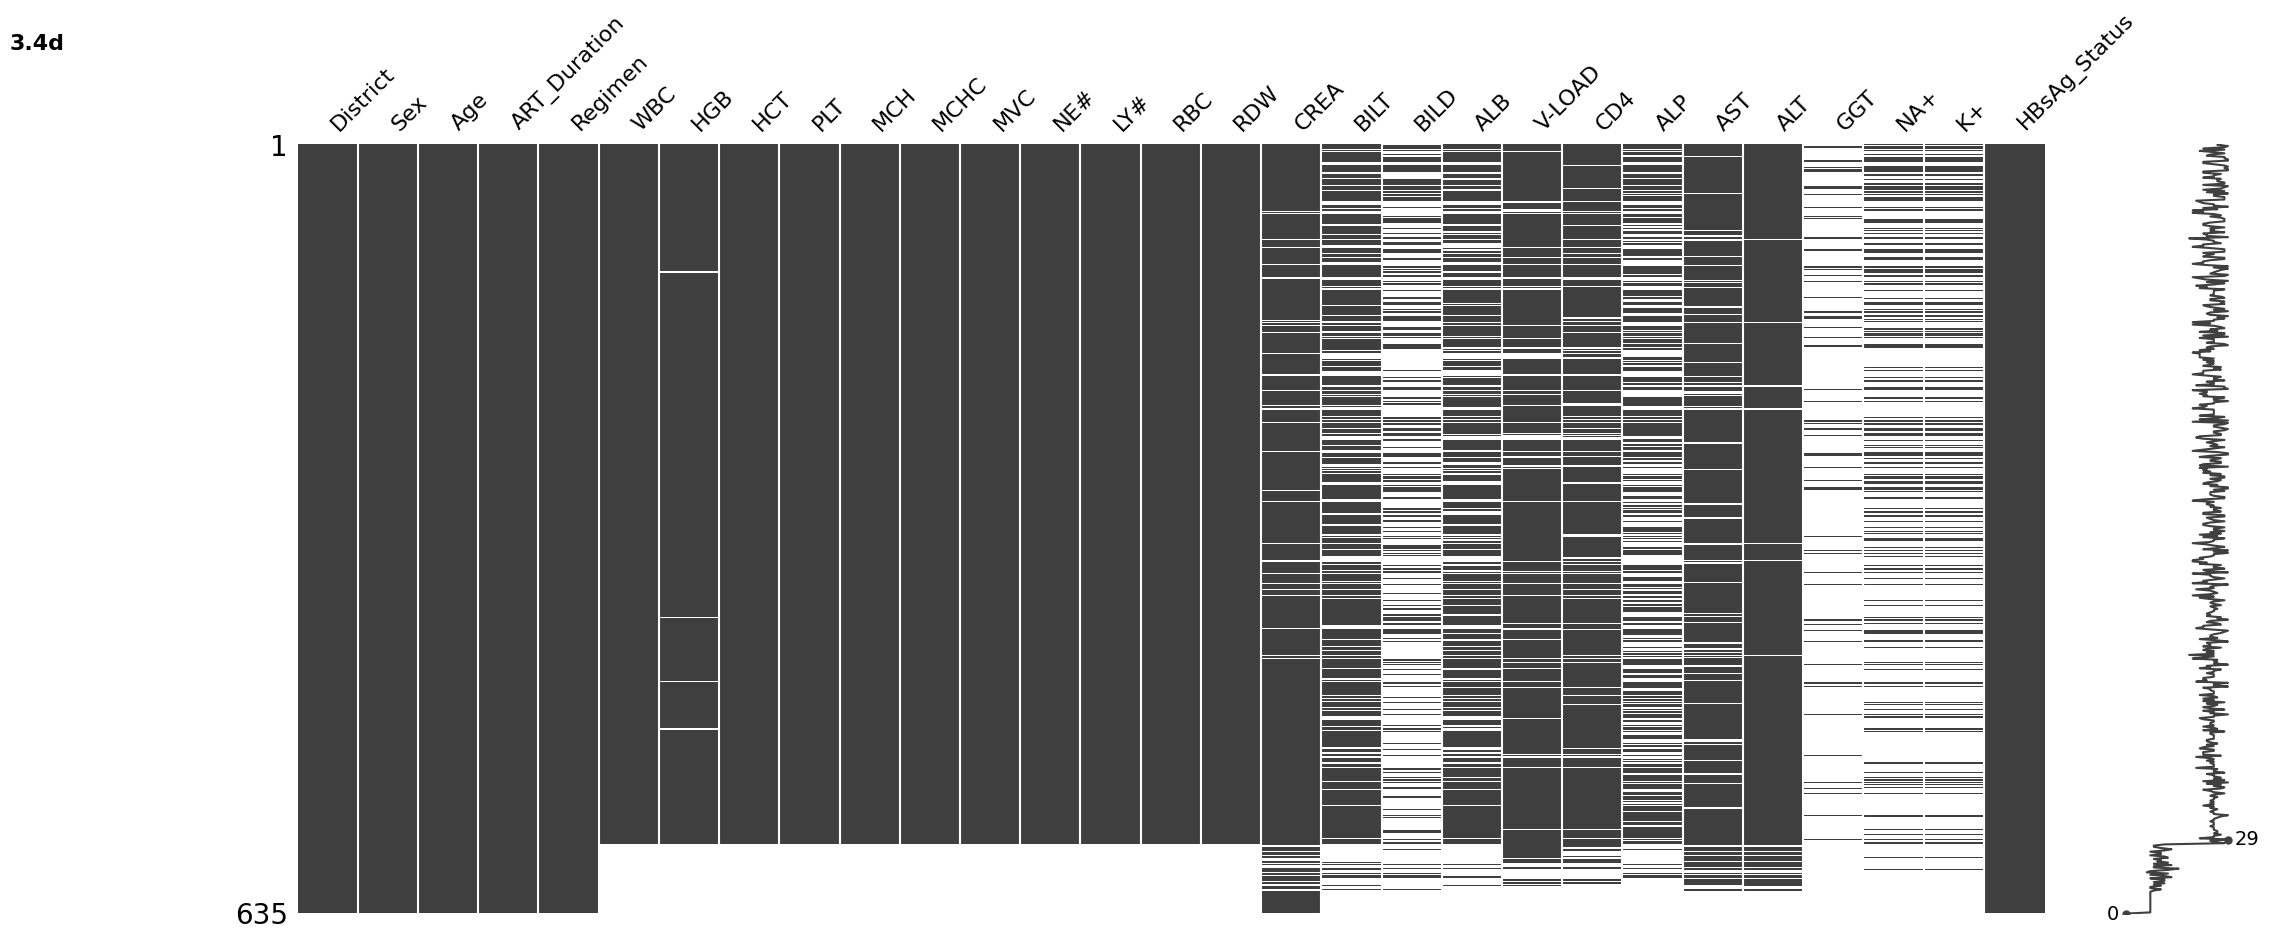

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot the missingness matrix
ax = msno.matrix(df1)

# Get the current figure
fig = plt.gcf()

# Add figure label 3.4d in the top-left corner
fig.text(0.01, 0.99, "3.4d", fontsize=16, fontweight='bold', va='top', ha='left')

plt.show()


## Calcaluting the missing percentage per column/feature

In [15]:
# Calculate missing percentage per column
missing_percentage = df1.isnull().mean() * 100

#Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

print(missing_percentage)

GGT             91.023622
K+              73.858268
NA+             73.858268
BILD            69.763780
ALP             46.929134
ALB             33.385827
BILT            29.133858
CD4             17.165354
V-LOAD          14.645669
AST             13.543307
HGB              9.763780
LY#              9.133858
RDW              9.133858
RBC              9.133858
NE#              9.133858
MCHC             9.133858
MCH              9.133858
PLT              9.133858
HCT              9.133858
WBC              9.133858
MVC              9.133858
CREA             7.244094
ALT              5.984252
District         0.157480
Sex              0.157480
Regimen          0.157480
ART_Duration     0.157480
Age              0.157480
HBsAg_Status     0.157480
dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing percentage per column
missing_percentage = df1.isnull().mean() * 100

# Filter only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Convert to DataFrame for better formatting
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Feature', 'Missing Percentage (%)']

# Plot table as image
fig, ax = plt.subplots(figsize=(6, len(missing_df)*0.4 + 1))  # size depends on rows

# Hide axes
ax.axis('off')

# Create table plot
table = ax.table(
    cellText=missing_df.values,
    colLabels=missing_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.2)  # scale width, height

plt.tight_layout()

# Save the table as PNG image
plt.savefig('missing_data_percentage.png', dpi=300, bbox_inches='tight')
plt.close()

print("Missing data percentage table saved as missing_data_percentage.png")


Missing data percentage table saved as missing_data_percentage.png


## Creating a copy of the cleaned dataset

In [17]:
#creating a new copy of the data 
copy_df2 = df1.copy()
copy_df2


,District,Sex,Age,ART_Duration,Regimen,WBC,HGB,HCT,PLT,MCH,...,ALB,V-LOAD,CD4,ALP,AST,ALT,GGT,NA+,K+,HBsAg_Status
0,Rukungiri,M,60.0,3066.0,DTG/ATVr-based,1.10,7.8,22.4,81.0,32.4,...,3.74,4340,79,60.4,45.2,24.5,NaN,114.8,4.93,0.0
1,Wakiso,F,45.0,3436.0,DTG-based,1.80,12.1,34.6,251.0,26.6,...,4.38,40,3,91.9,114.5,123.4,NaN,NaN,NaN,0.0
2,Mbarara,M,68.0,271.0,DTG-based,1.92,10.3,31.3,118.0,27.6,...,3.60,118698,58,82.1,30.4,13.2,18.2,129.8,3.98,0.0
3,Kampala,F,46.0,2098.0,DTG-based,2.00,11.9,34.6,84.0,30.9,...,3.56,555000,153,108.6,25.9,15.5,NaN,131.3,4.92,0.0
4,Kampala,F,55.0,1092.0,DTG-based,2.00,11.8,35.5,144.0,30.0,...,NaN,50,493,NaN,24.1,22.4,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Wakiso,M,31.0,314.0,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
631,Wakiso,M,21.0,306.0,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,Wakiso,M,31.0,293.0,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
633,Wakiso,M,31.0,195.0,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Numerical Features

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

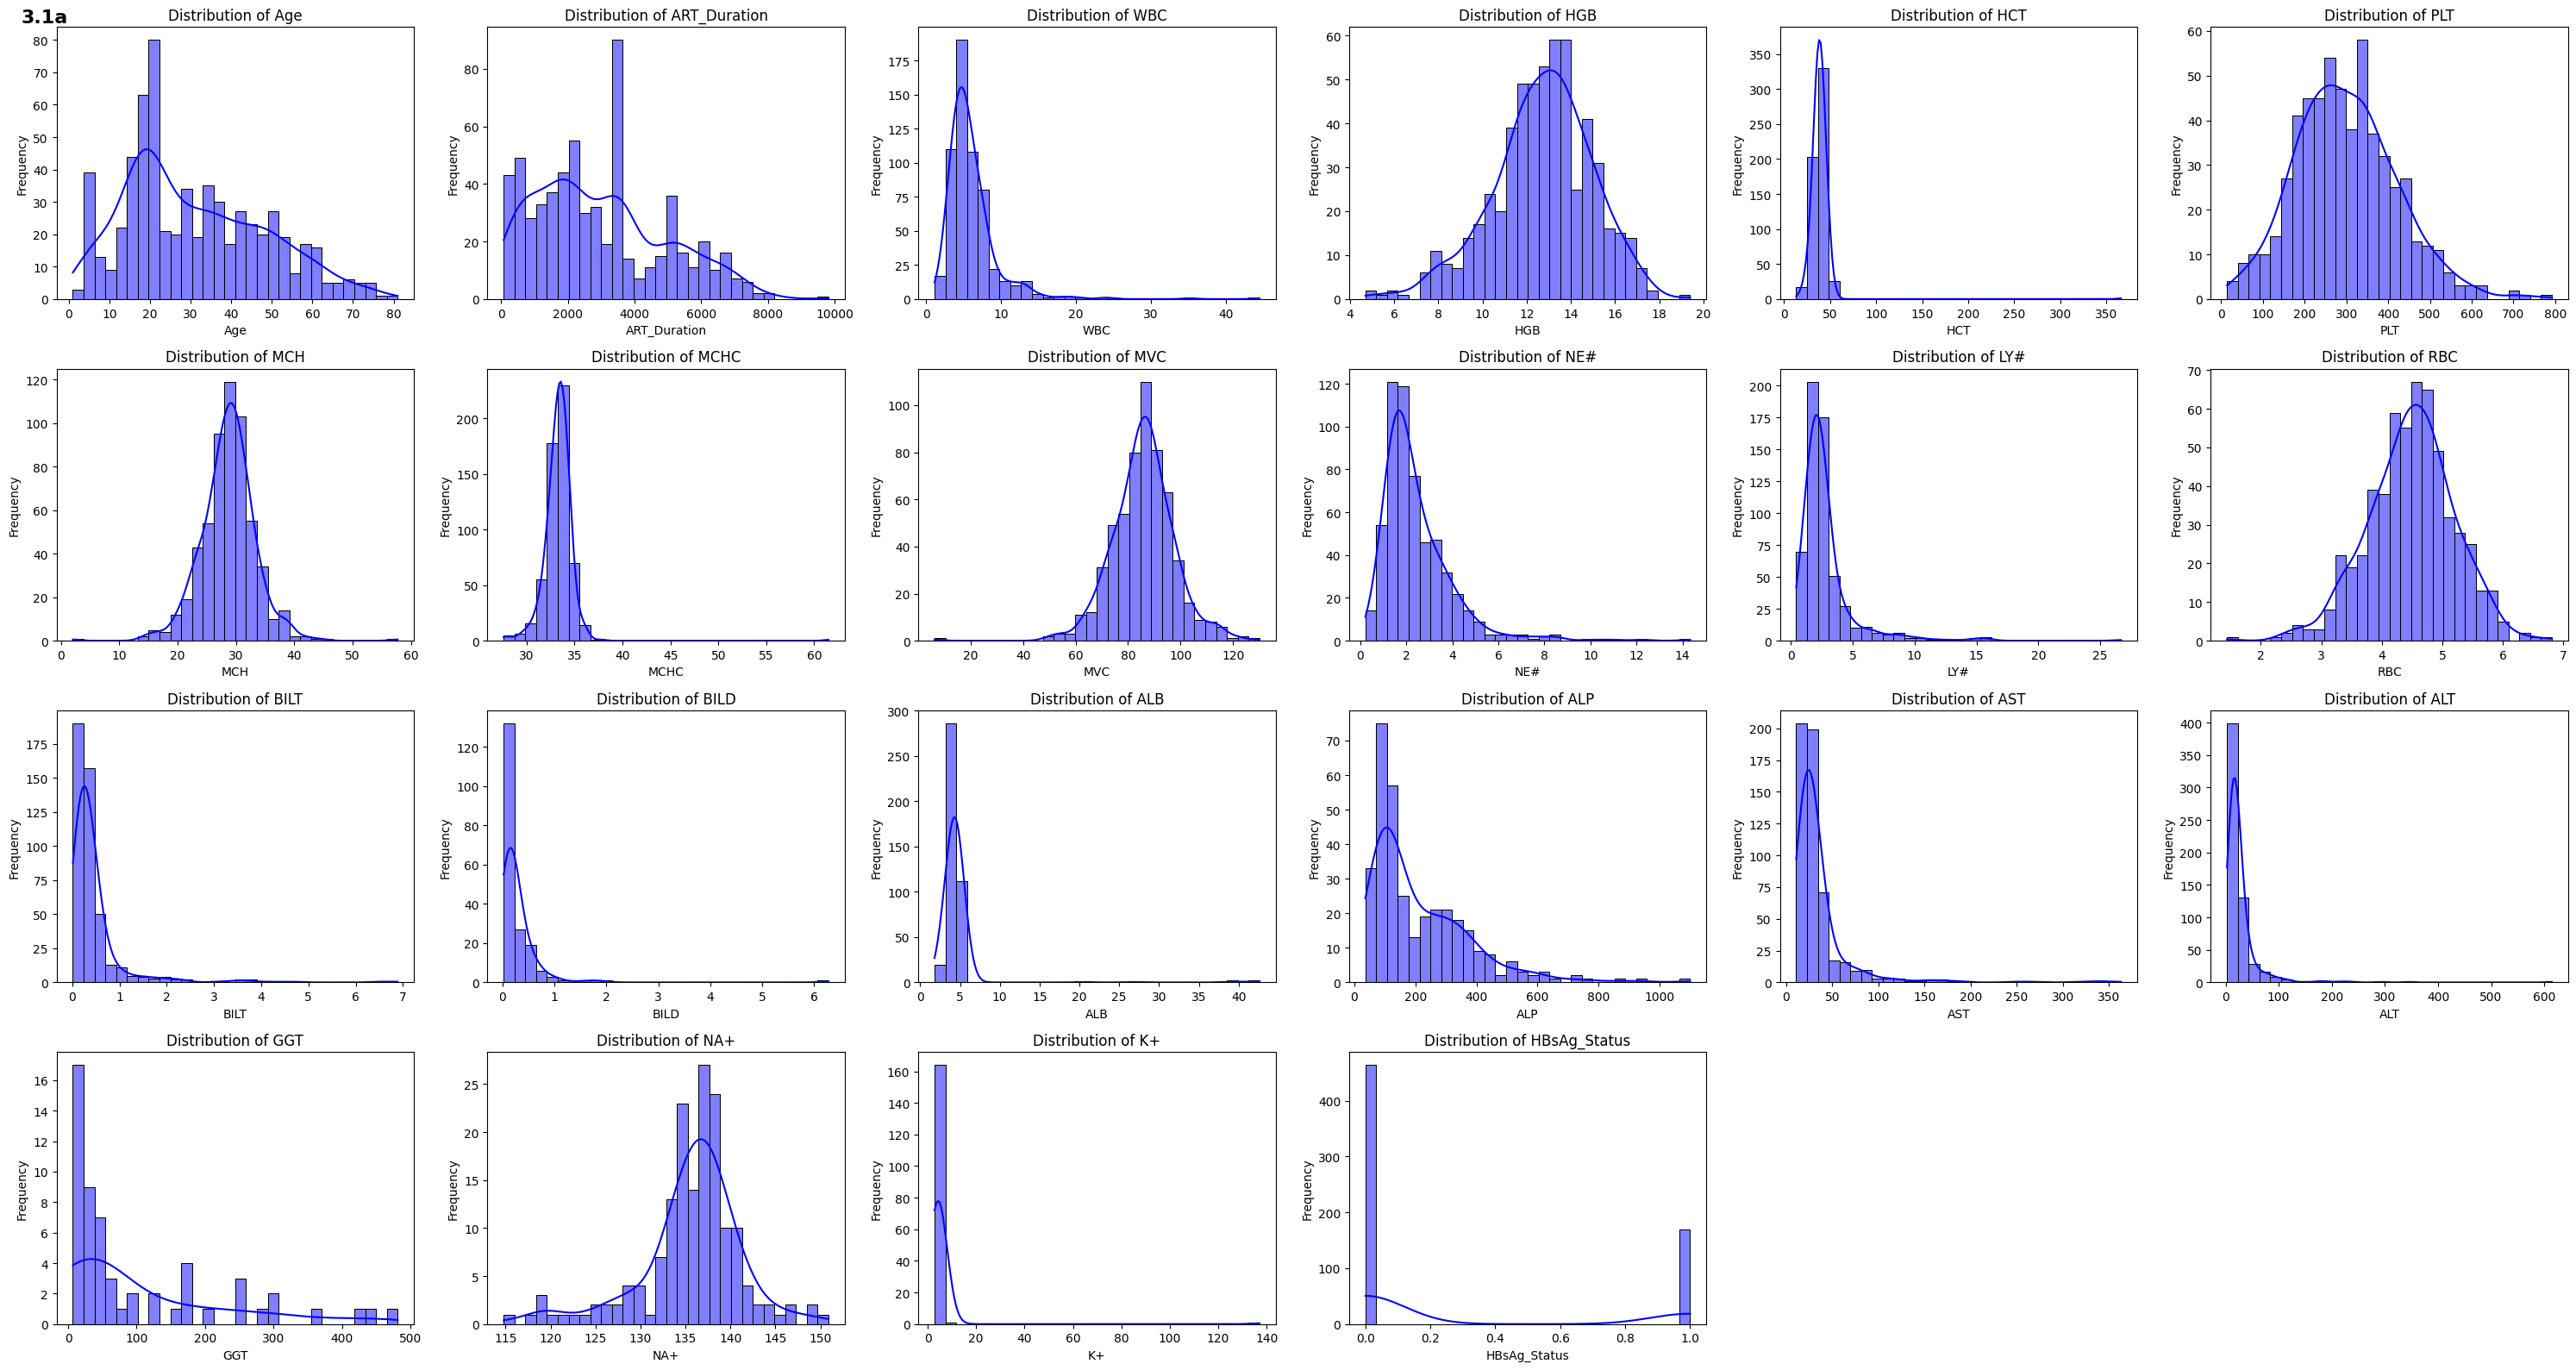

In [18]:

import math

# Select numeric columns
numeric_cols = copy_df2.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size
n_cols = 6  # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Plot each numeric variable
for i, col in enumerate(numeric_cols):
    sns.histplot(copy_df2[col].dropna(), kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


# Add figure label 3.2b in top-left corner of the figure
fig.text(0.01, 0.99, "3.1a", fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()




## Categorical features

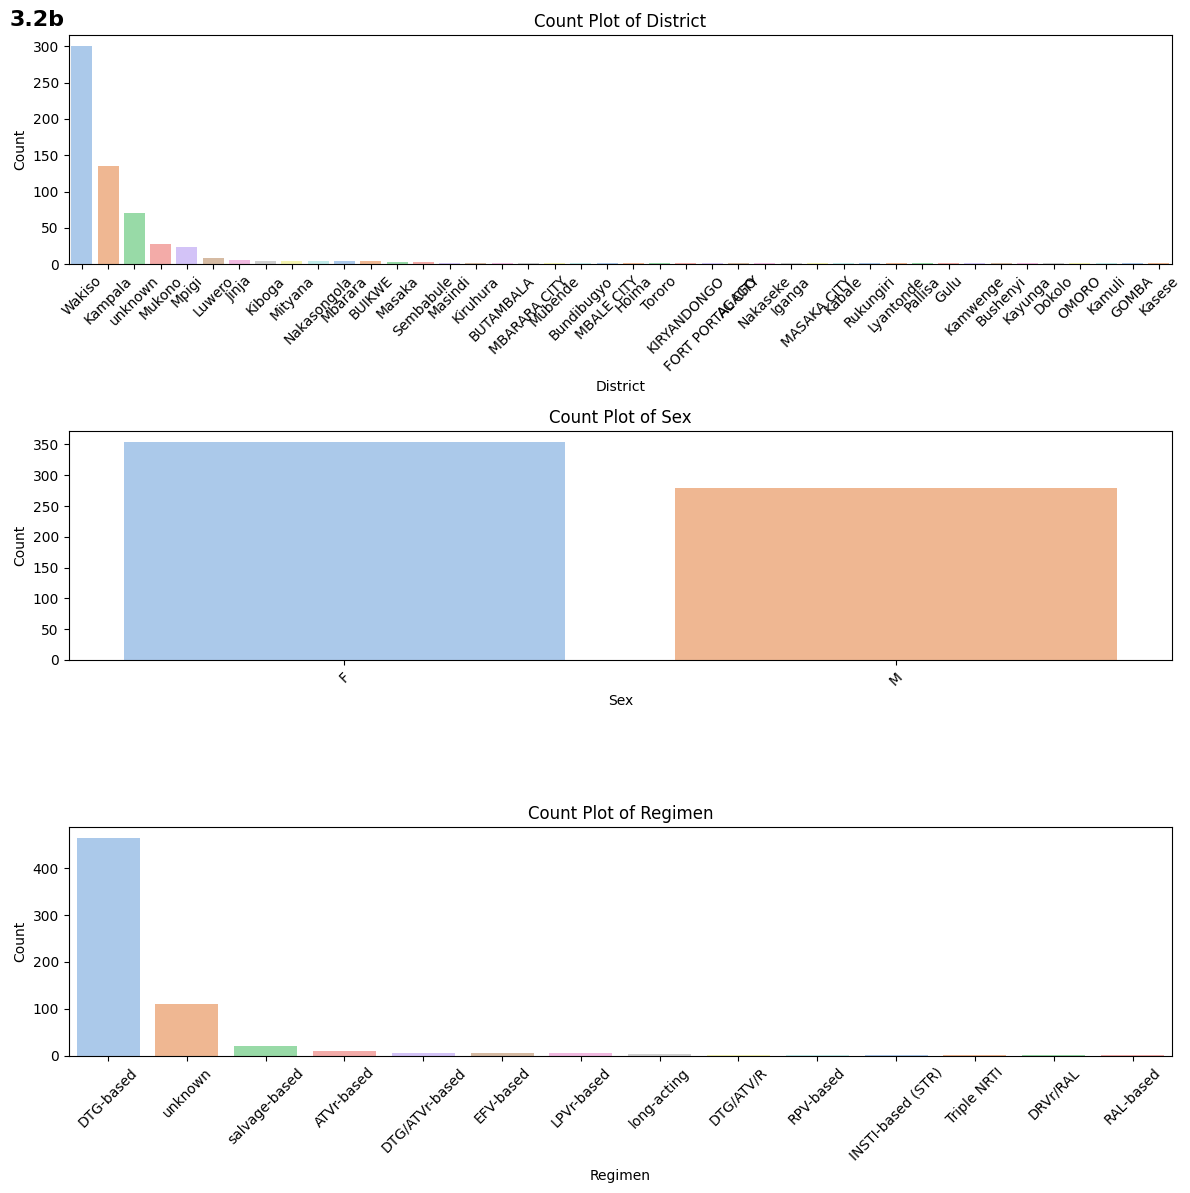

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify only the categorical columns you want
categorical_cols = ["District", "Sex", "Regimen"]

# Set up figure and axes
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, len(categorical_cols) * 4))

# If only one axis, make it iterable
if len(categorical_cols) == 1:
    axes = [axes]

# Loop through each categorical feature and plot
for ax, col in zip(axes, categorical_cols):
    sns.countplot(
        x=copy_df2[col],
        order=copy_df2[col].value_counts().index,
        palette="pastel",
        ax=ax
    )
    ax.set_title(f"Count Plot of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add figure label 3.2b in top-left corner of the figure
fig.text(0.01, 0.99, "3.2b", fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()


## Imputation of the cleaned dataset.
### Imputation is a technique used to fill in missing values in a dataset.This is common in real-world medical records due to lab errors, incomplete tests, or manual entry issues.


In [20]:


from sklearn.impute import SimpleImputer

# List of columns to impute (ensure all are separated by commas)
columns_to_impute = ['WBC', 'HGB', 'HCT', 'PLT', 'MCH', 'MCHC', 'MVC',
                     'NE#', 'LY#', 'RBC', 'RDW', 'CREA', 'BILT', 'ALB',
                     'V-LOAD', 'CD4', 'ALP', 'AST', 'ALT']

# Clean and convert each column before imputation
for col in columns_to_impute:
    # Replace invalid formatting like double periods and trim whitespace
    copy_df2[col] = copy_df2[col].astype(str).str.replace('..', '.', regex=False).str.strip()

    # Convert to numeric, setting invalid entries to NaN
    copy_df2[col] = pd.to_numeric(copy_df2[col], errors='coerce')

# Create a median imputer
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the selected columns
copy_df2[columns_to_impute] = imputer.fit_transform(copy_df2[columns_to_impute])


# Save the imputed dataset to a CSV file
copy_df2.to_csv("imputed_dataset2.csv", index=False)

print("Imputed dataset saved as 'imputed_dataset2.csv'")

Imputed dataset saved as 'imputed_dataset2.csv'


## Checking for missingness in the dataset.

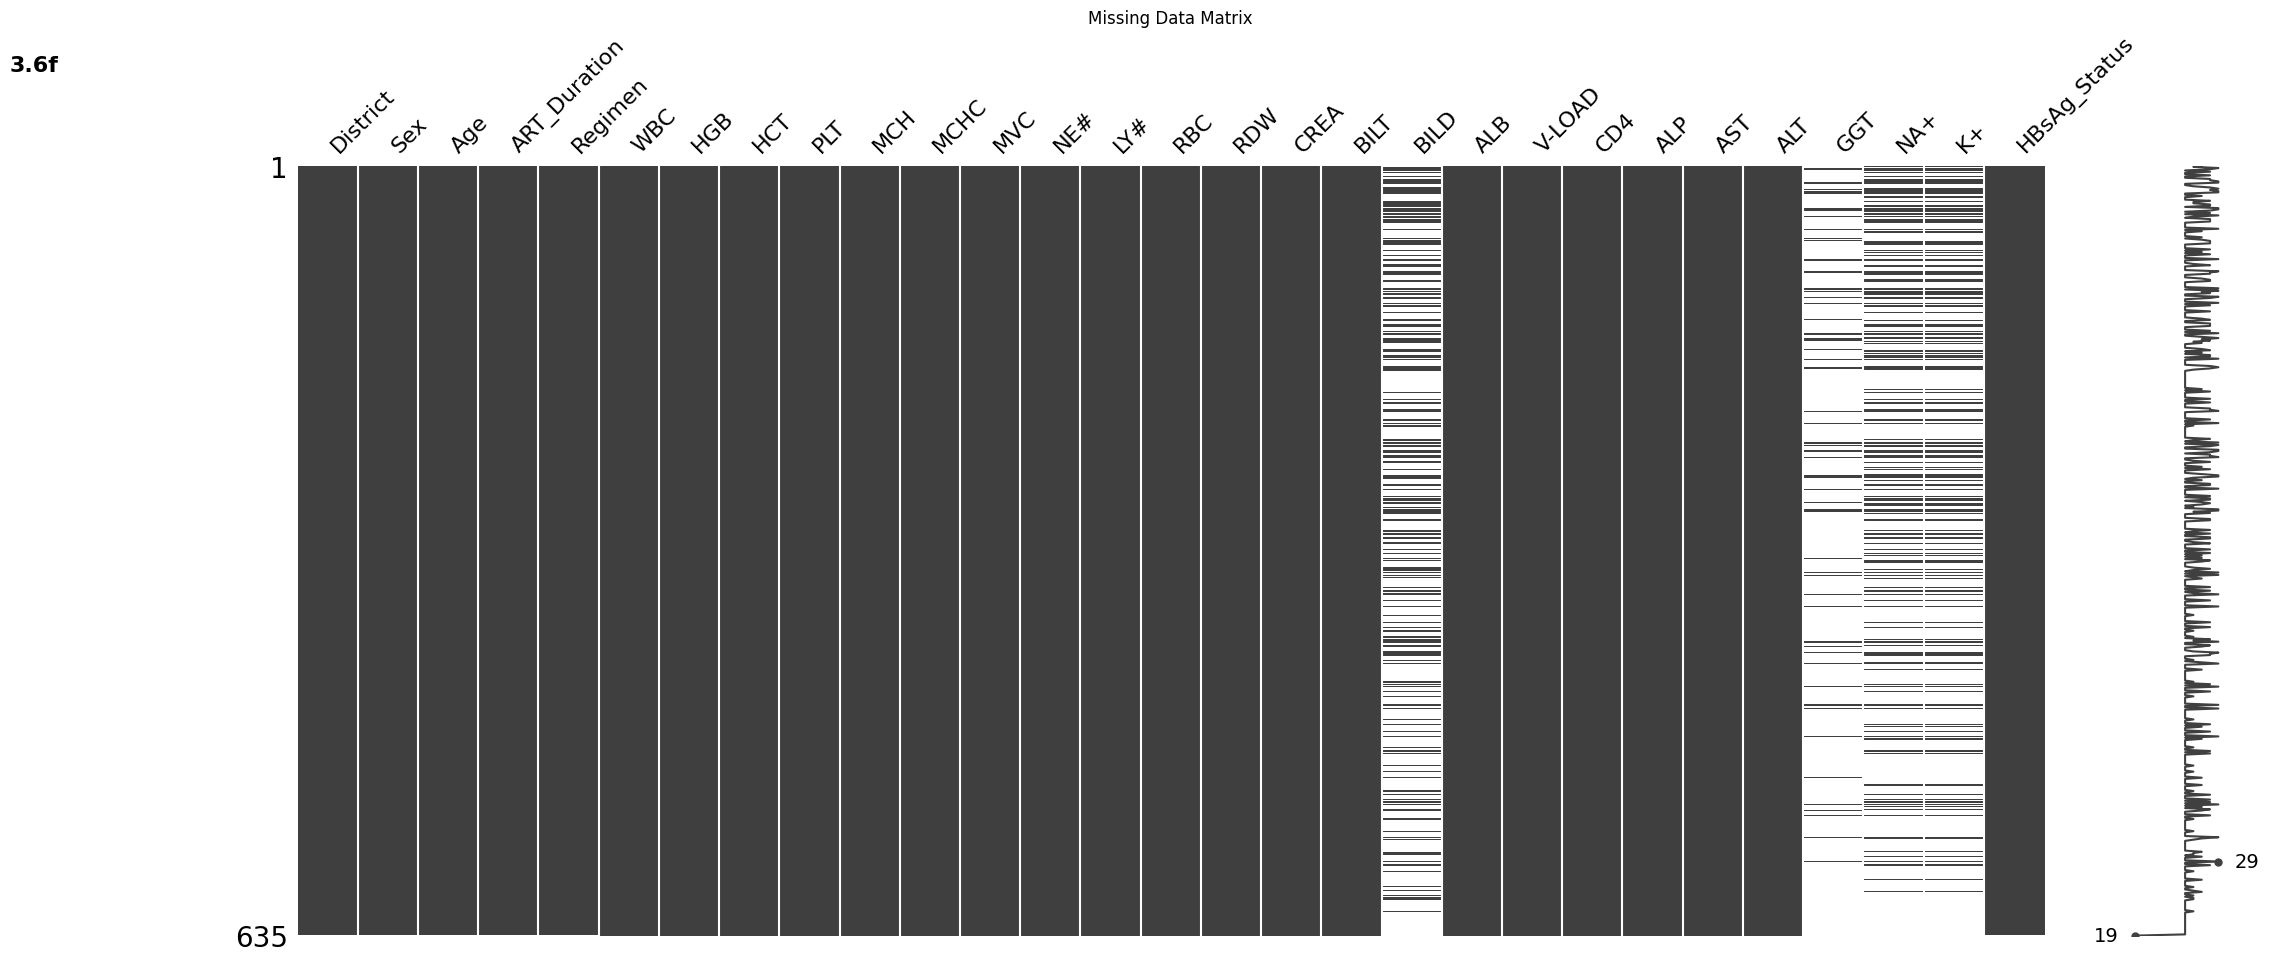

In [21]:
import missingno as msno
import matplotlib.pyplot as plt

# Display missing data matrix
ax = msno.matrix(copy_df2)

# Add title
plt.title("Missing Data Matrix")

# Get current figure
fig = plt.gcf()

# Add figure label 3.6f in the top-left corner
fig.text(0.01, 0.99, "3.6f", fontsize=16, fontweight='bold', va='top', ha='left')

plt.show()


## Dropping off Features/Columns with high missing values greater than 50%.I used `SimpleImputer` for missing data.
### Dropping features with a high proportion of missing data is a standard data preprocessing step to reduce noise and avoid unreliable imputations. In this study, a threshold of 50% was selected—meaning any column missing more than half of its values was excluded. This is because:

- Columns with excessive missingness can introduce bias and weaken model performance if imputed improperly.

- Imputing such columns would rely heavily on assumptions rather than actual data.

- 50% is a widely accepted benchmark in data science to balance retaining informative features and ensuring data quality.

### This decision helped retain the most reliable variables while maintaining the integrity and interpretability of the model.

In [22]:
# Calculate missing percentage per column
missing_percentage = copy_df2.isnull().mean() * 100

#Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort in descending order (optional)
missing_percentage = missing_percentage.sort_values(ascending=False)

print(missing_percentage)

GGT             91.023622
NA+             73.858268
K+              73.858268
BILD            69.763780
District         0.157480
Sex              0.157480
Age              0.157480
ART_Duration     0.157480
Regimen          0.157480
HBsAg_Status     0.157480
dtype: float64


## Dropping off features/columns with high missingness greater than 50% 

In [23]:


# Calculate the percentage of missing values per column
missing_percent = copy_df2.isnull().mean() * 100

# Set a threshold (e.g., 50%)
threshold = 50

# Identify columns to drop
cols_to_drop = missing_percent[missing_percent > threshold].index

# Drop the identified columns
copy_df = copy_df2.drop(columns=cols_to_drop)

# Save the cleaned dataset to a new CSV file
copy_df.to_csv('finaldataset.csv', index=False)

# Print what was dropped
print(f"Dropped columns with more than {threshold}% missing values:\n{cols_to_drop.tolist()}")



Dropped columns with more than 50% missing values:
['BILD', 'GGT', 'NA+', 'K+']


## Load the final dataset after imputation and dropping off the features with high missingness

In [24]:
#load the final dataset 

df3 = pd.read_csv('finaldataset.csv')
df3


,District,Sex,Age,ART_Duration,Regimen,WBC,HGB,HCT,PLT,MCH,...,RDW,CREA,BILT,ALB,V-LOAD,CD4,ALP,AST,ALT,HBsAg_Status
0,Rukungiri,M,60.0,3066.0,DTG/ATVr-based,1.10,7.8,22.4,81.0,32.4,...,18.8,0.80,0.540,3.74,4340.0,79.0,60.4,45.2,24.5,0.0
1,Wakiso,F,45.0,3436.0,DTG-based,1.80,12.1,34.6,251.0,26.6,...,15.2,0.54,0.410,4.38,40.0,3.0,91.9,114.5,123.4,0.0
2,Mbarara,M,68.0,271.0,DTG-based,1.92,10.3,31.3,118.0,27.6,...,16.9,0.91,0.370,3.60,118698.0,58.0,82.1,30.4,13.2,0.0
3,Kampala,F,46.0,2098.0,DTG-based,2.00,11.9,34.6,84.0,30.9,...,11.0,0.66,0.330,3.56,555000.0,153.0,108.6,25.9,15.5,0.0
4,Kampala,F,55.0,1092.0,DTG-based,2.00,11.8,35.5,144.0,30.0,...,12.1,0.58,0.275,4.39,50.0,493.0,147.2,24.1,22.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Wakiso,M,31.0,314.0,unknown,5.20,12.9,38.4,291.0,28.8,...,12.8,0.92,0.275,4.39,20.0,721.0,147.2,25.6,18.0,1.0
631,Wakiso,M,21.0,306.0,unknown,5.20,12.9,38.4,291.0,28.8,...,12.8,1.21,0.275,4.39,20.0,721.0,147.2,25.6,18.0,1.0
632,Wakiso,M,31.0,293.0,unknown,5.20,12.9,38.4,291.0,28.8,...,12.8,1.03,0.275,4.39,20.0,721.0,147.2,25.6,18.0,1.0
633,Wakiso,M,31.0,195.0,unknown,5.20,12.9,38.4,291.0,28.8,...,12.8,0.70,0.275,4.39,20.0,721.0,147.2,25.6,18.0,1.0


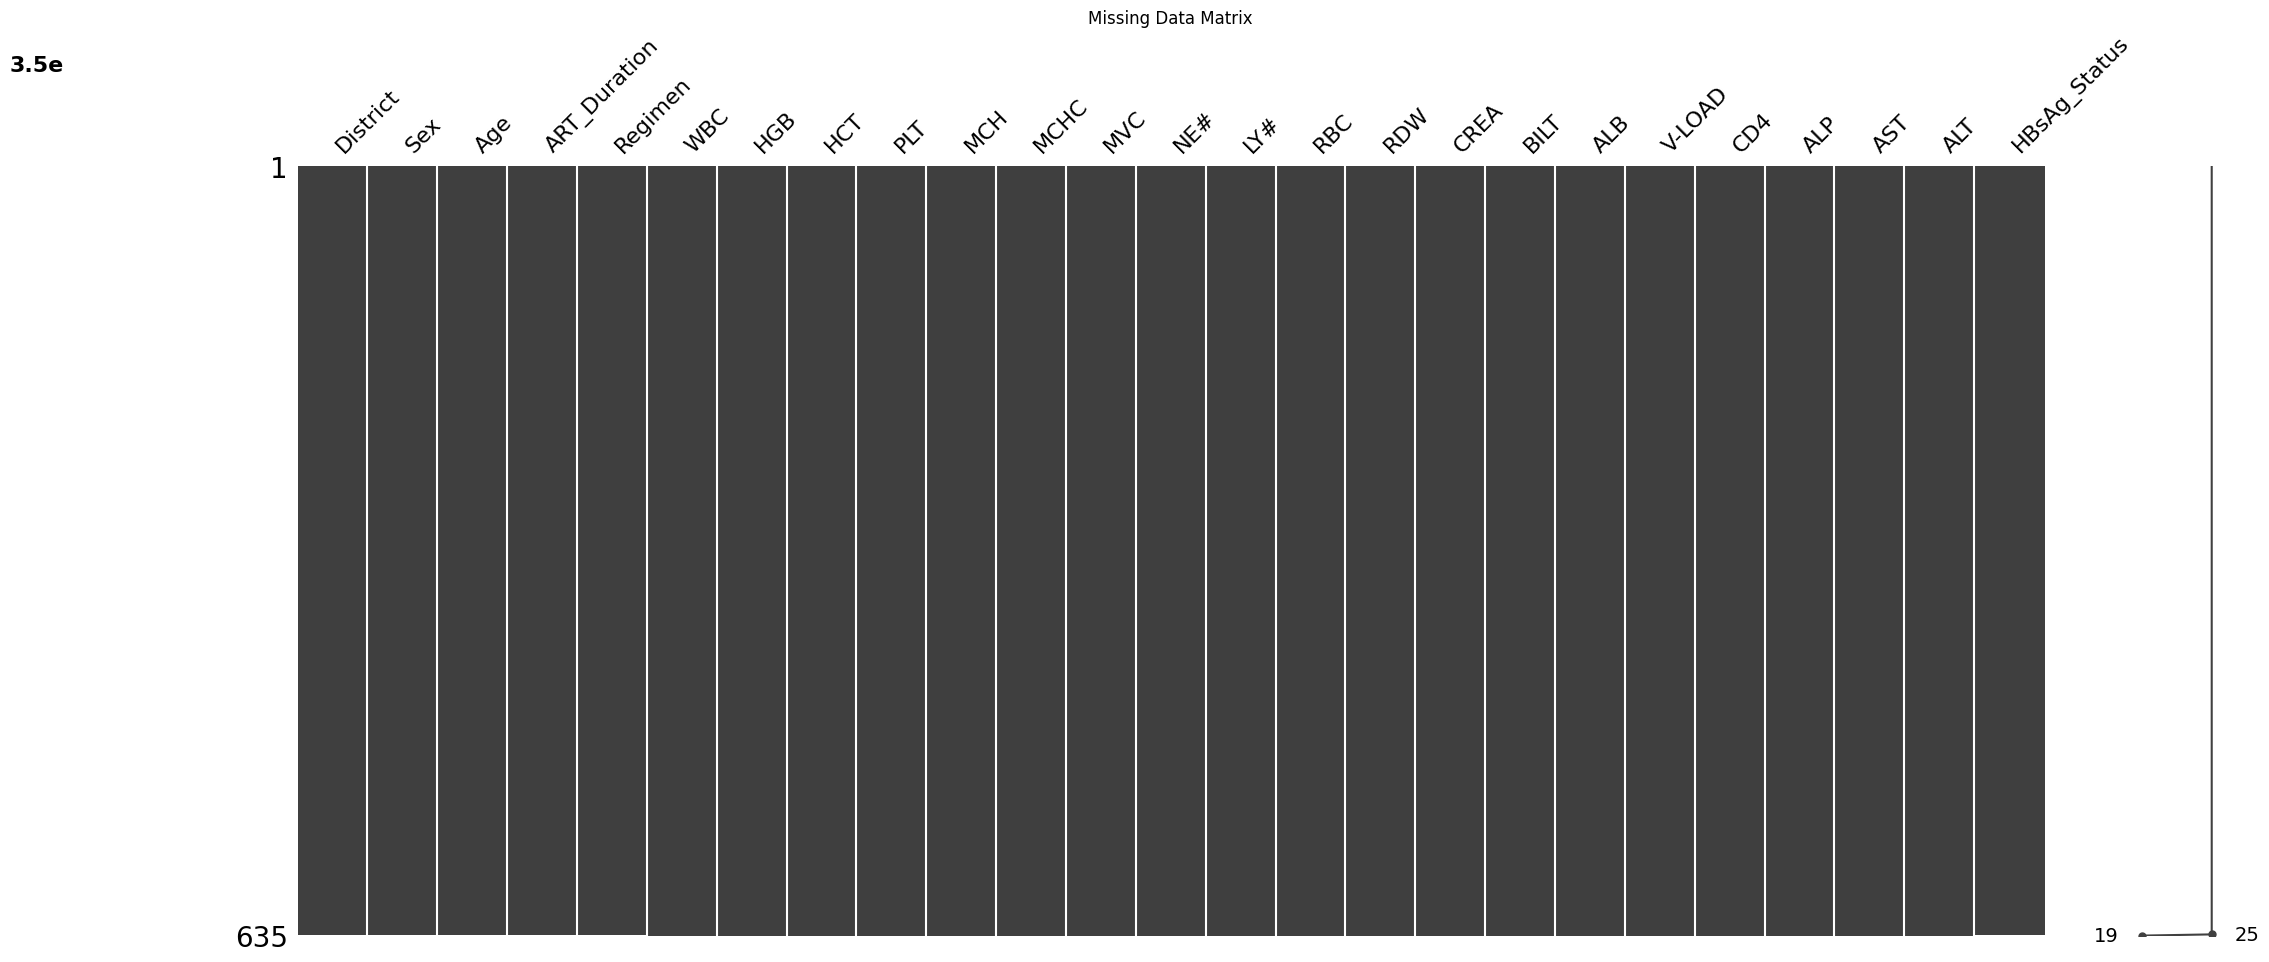

In [25]:
import missingno as msno
import matplotlib.pyplot as plt

## Missingness matrix
# Show missing data matrix
ax = msno.matrix(df3)

# Add title
plt.title("Missing Data Matrix")

# Get current figure
fig = plt.gcf()

# Add figure label 3.5e in the top-left corner
fig.text(0.01, 0.99, "3.5e", fontsize=16, fontweight='bold', va='top', ha='left')

plt.show()


## Compute the Correlation Matrix for Numerical Columns.
### The correlation matrix is a table showing correlation coefficients between numerical features. Each cell in the matrix represents the correlation between two variables. These coefficients range from:

- +1: Perfect positive correlation

- 0: No correlation

- –1: Perfect negative correlation

# Importance
- Helps identify relationships and dependencies among features.

- Allows detection of multicollinearity—when two or more variables are highly correlated, which can affect model performance.

- Informs feature selection, helping to eliminate redundant variables that do not add value to the predictive model.



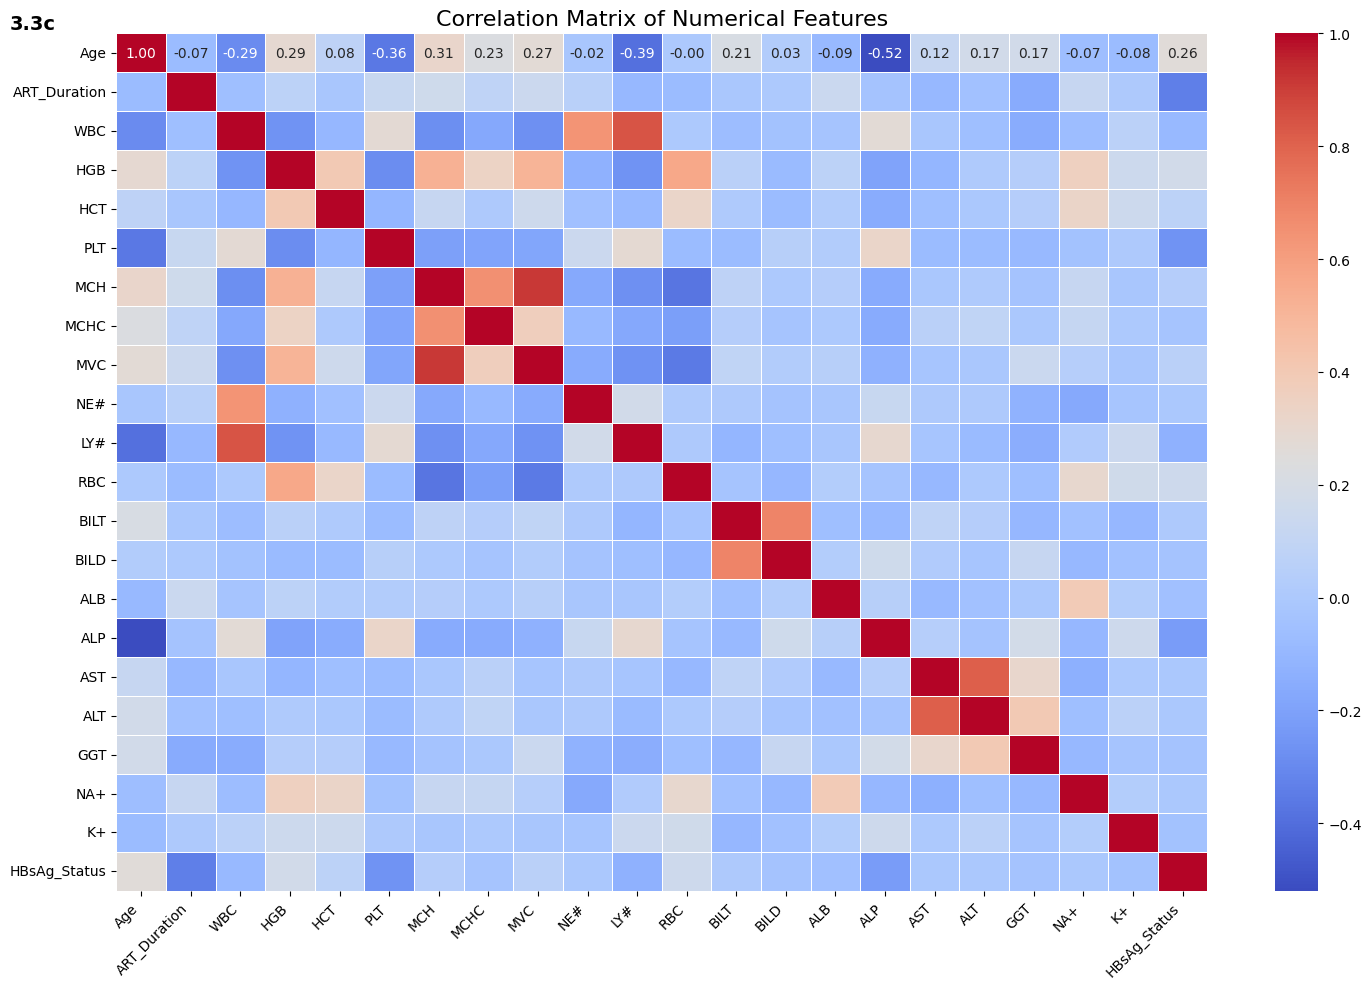

In [26]:


# Compute correlation matrix (numeric only)
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add label in the top-left corner of the figure
plt.figtext(
    0.01, 0.98,    # (x, y) in figure coordinates (0=left/bottom, 1=right/top)
    "3.3c", 
    ha="left", 
    va="top", 
    fontsize=14, 
    fontweight="bold", 
    color="black"
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


## Feature Engineering
### Feature engineering is the process of transforming raw data into meaningful input features that improve the predictive power of your machine learning model.This is why this is helpful
- It helps your model understand relationships in the data more easily.

- It boosts performance by turning messy, high-dimensional data into more useful, compact representations.

- It can introduce clinically meaningful insights (e.g., grouping CD4 count into low/high risk levels).




In [27]:
## Copy the dataset to preserve the original
df_fe = df3.copy()
df_fe


#Encode 'Sex' column
df_fe['Sex'] = df_fe['Sex'].map({'M': 1, 'F': 0})
df_fe

# One-hot encode 'District' and 'Regimen', drop the first category to avoid multicollinearity
#df_fe = pd.get_dummies(df_fe, columns=['District', 'Regimen'], drop_first=True)

#df_fe = df_fe[(df_fe['Regimen'] != 'unknown') & (df_fe['District'] != 'unknown')]
#df_fe = pd.get_dummies(df_fe, columns=['District', 'Regimen'], drop_first=True)

# Step 1: Drop rows where 'District' or 'Regimen' is 'unknown'
df_cleaned = df_fe[(df_fe['Regimen'] != 'unknown') & (df_fe['District'] != 'unknown')]

# Step 2: Apply one-hot encoding (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df_cleaned, columns=['District', 'Regimen'], drop_first=True)

# Step 3: Save the cleaned and encoded dataset
df_encoded.to_csv("final_encoded_dataset.csv", index=False)

print("Dataset cleaned, encoded, and saved as 'final_encoded_dataset.csv'.")





Dataset cleaned, encoded, and saved as 'final_encoded_dataset.csv'.


In [30]:
df_en['HBsAg_Status'].isna().sum()


0

## Train-Test Split of the dataset

In [29]:
#  Train-Test Split
from sklearn.model_selection import train_test_split

#load the dataset
df4 = pd.read_csv('final_encoded_dataset.csv')
df4

# Copy the dataset to preserve the original
df_en = df4.copy()
df_en


df_en = df_en.dropna(subset=['HBsAg_Status'])

X = df_en.drop('HBsAg_Status', axis=1)
y = df_en['HBsAg_Status']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




## Dataset 
### This is to show how many Males and Females that are HBV positive and negative respectectively 

In [40]:


# Create a cross-tabulation using the correct column name
counts = pd.crosstab(df3['HBsAg_Status'], df3['Sex'])

# Add row totals
counts['Total'] = counts.sum(axis=1)

# Add column totals
counts.loc['Total'] = counts.sum(axis=0)

# Calculate percentages relative to total samples
percentages = counts.div(counts.loc['Total','Total']) * 100
percentages = percentages.round(1)

# Combine counts and percentages
table = counts.astype(str) + " (" + percentages.astype(str) + "%)"

# Display the final table
print(table)


# Save table as Excel
table.to_excel('HBsAg_status_summary.xlsx', sheet_name='Summary')



Sex                     F            M         Total
HBsAg_Status                                        
0.0           280 (44.2%)  184 (29.0%)   464 (73.2%)
1.0            74 (11.7%)   96 (15.1%)   170 (26.8%)
Total         354 (55.8%)  280 (44.2%)  634 (100.0%)


## Baseline modeling on the dataset

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 70, number of negative: 251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 321, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218069 -> initscore=-1.276958
[LightGBM] [Info] Start training from score -1.276958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

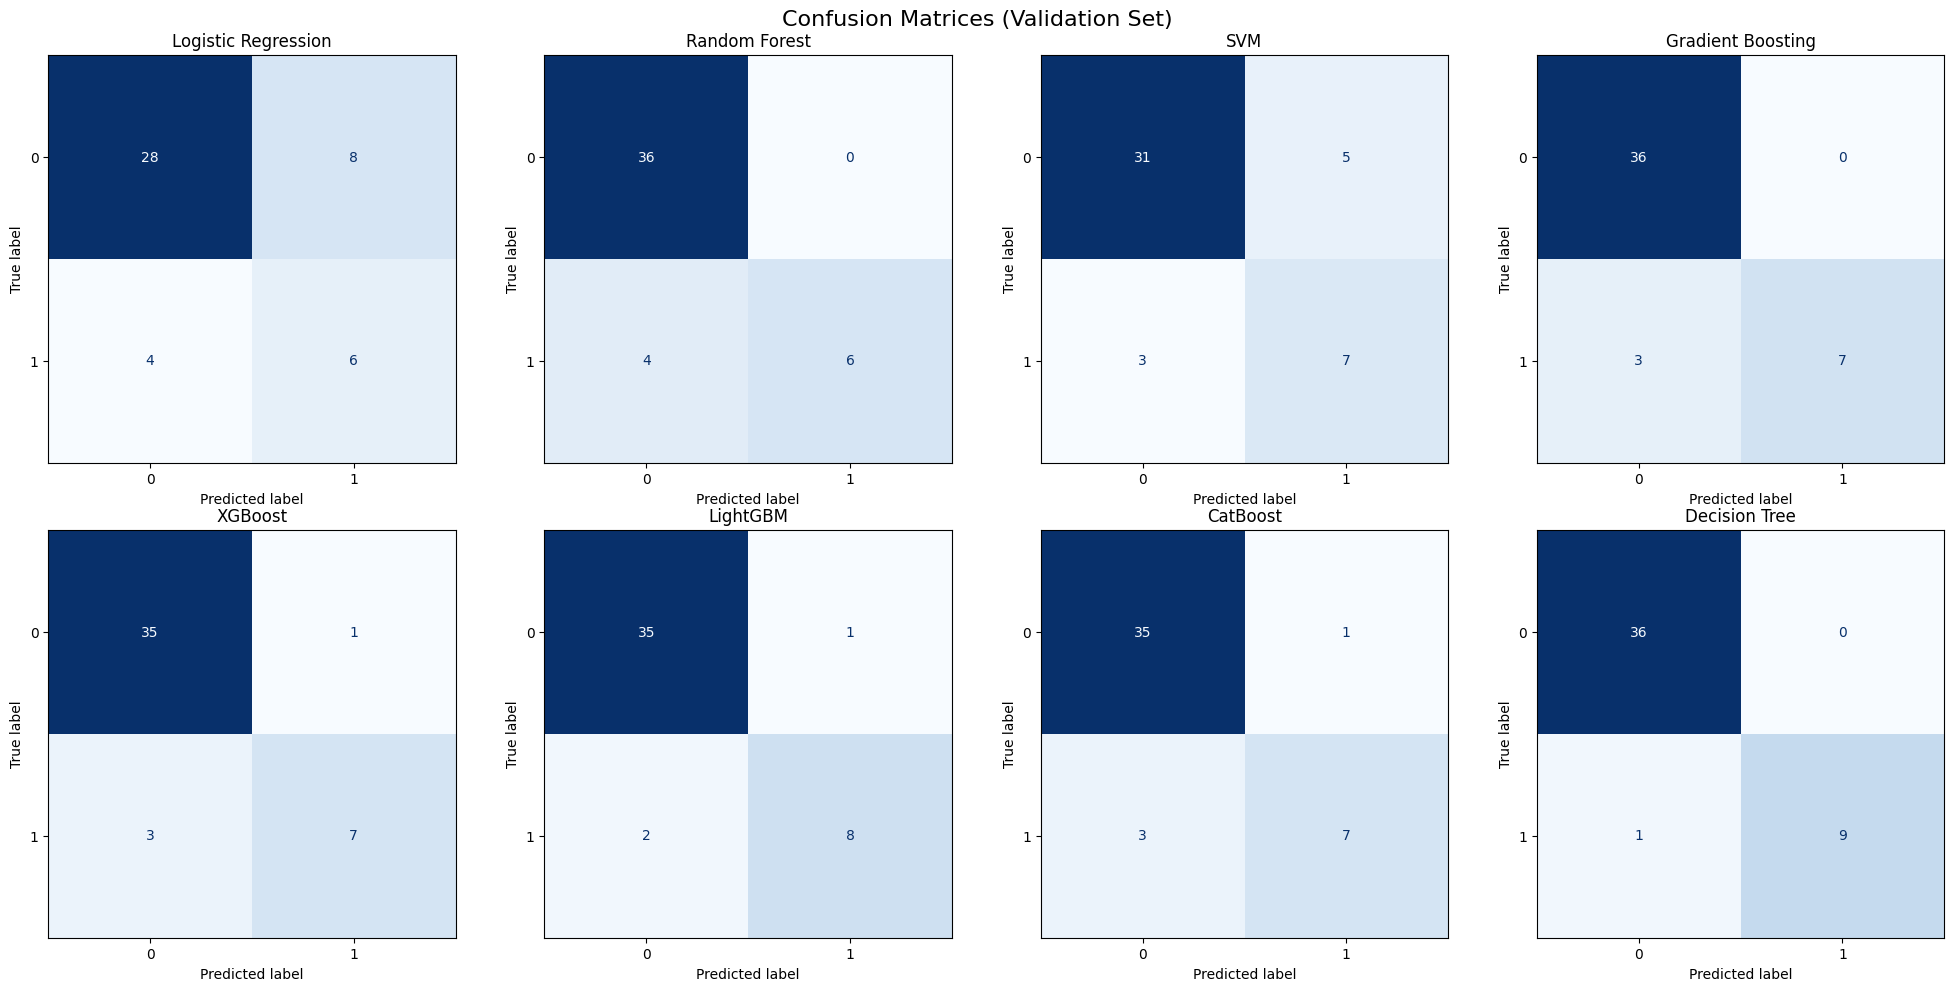

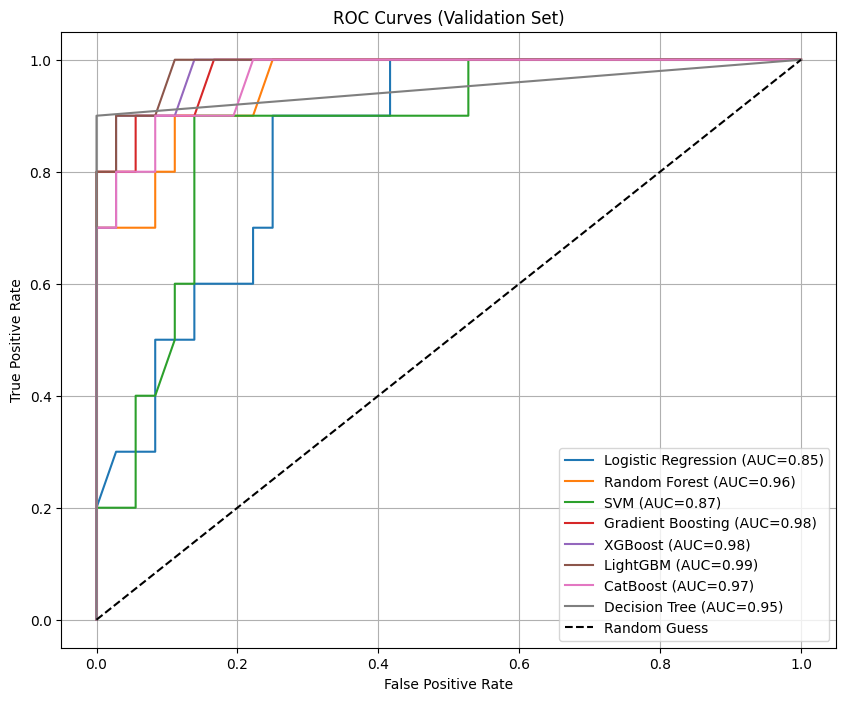

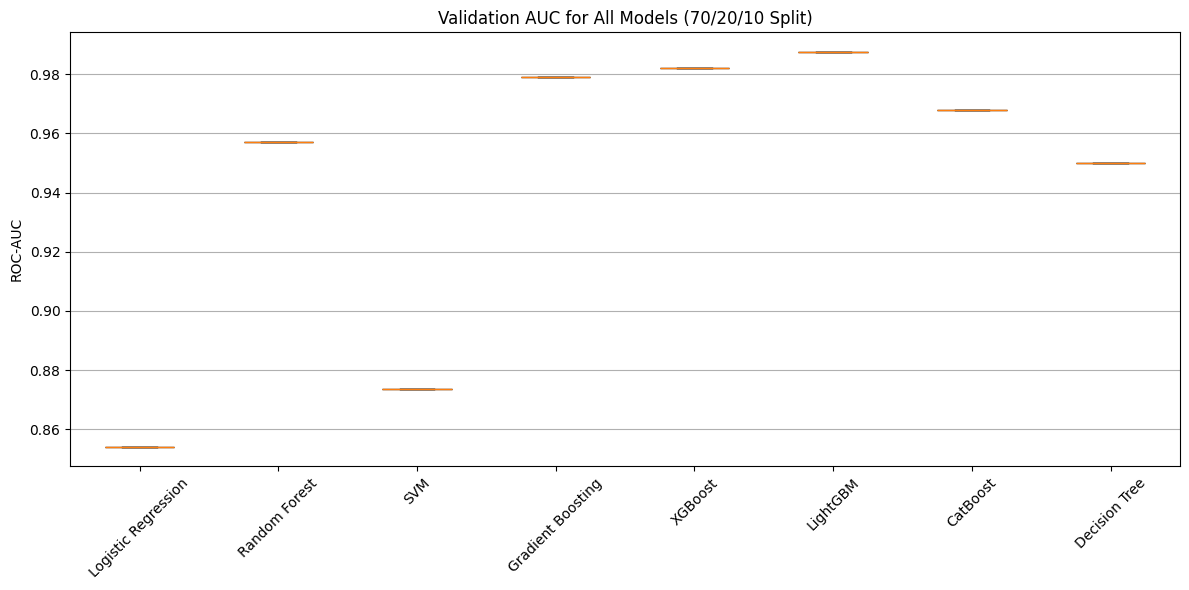

,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,MCC,ROC-AUC
Logistic Regression,0.739,0.429,0.6,0.778,0.500,0.339,0.854
Random Forest,0.913,1.000,0.6,1.000,0.750,0.735,0.957
SVM,0.826,0.583,0.7,0.861,0.636,0.527,0.874
Gradient Boosting,0.935,1.000,0.7,1.000,0.824,0.804,0.979
XGBoost,0.913,0.875,0.7,0.972,0.778,0.732,0.982
LightGBM,0.935,0.889,0.8,0.972,0.842,0.803,0.987
CatBoost,0.913,0.875,0.7,0.972,0.778,0.732,0.968
Decision Tree,0.978,1.000,0.9,1.000,0.947,0.936,0.950



Top 3 Models (MCC first, ROC-AUC as tiebreaker) - Validation Set:


,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,MCC,ROC-AUC
Decision Tree,0.978,1.000,0.9,1.000,0.947,0.936,0.950
Gradient Boosting,0.935,1.000,0.7,1.000,0.824,0.804,0.979
LightGBM,0.935,0.889,0.8,0.972,0.842,0.803,0.987


c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:0

[LightGBM] [Info] Number of positive: 56, number of negative: 200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218750 -> initscore=-1.272966
[LightGBM] [Info] Start training from score -1.272966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

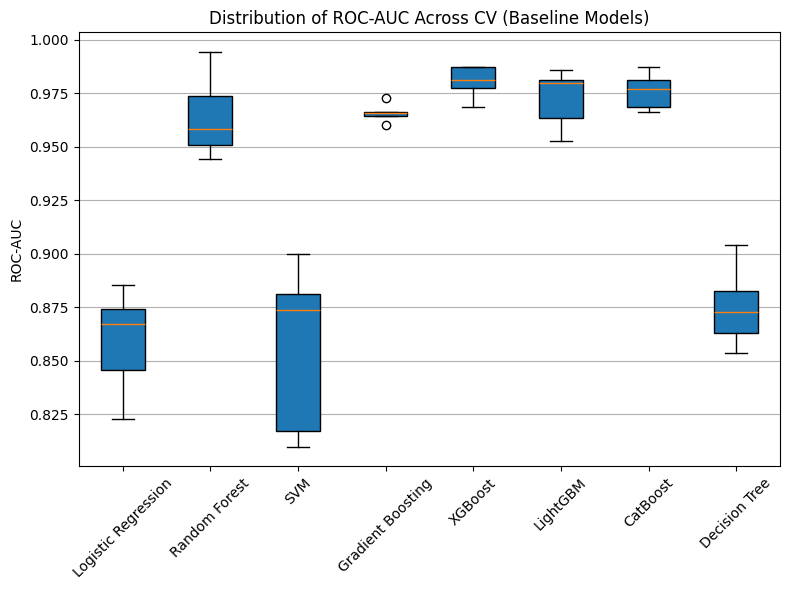

Decision Tree Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 1}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 70, number of negative: 251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 321, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from sc

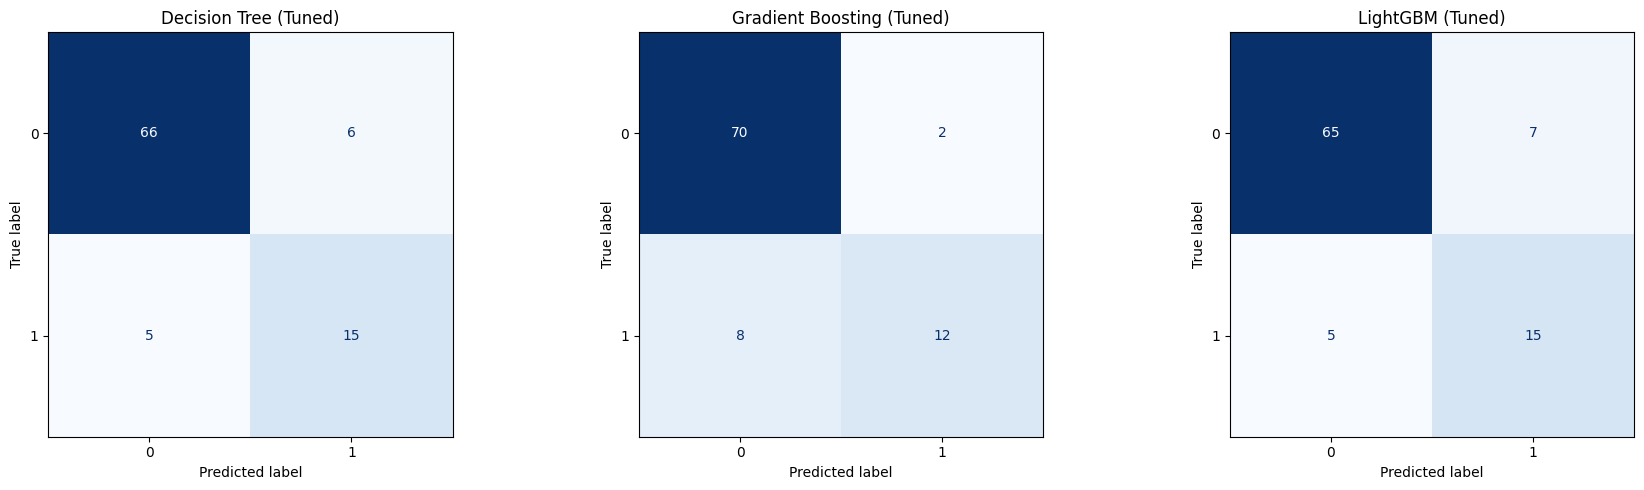

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


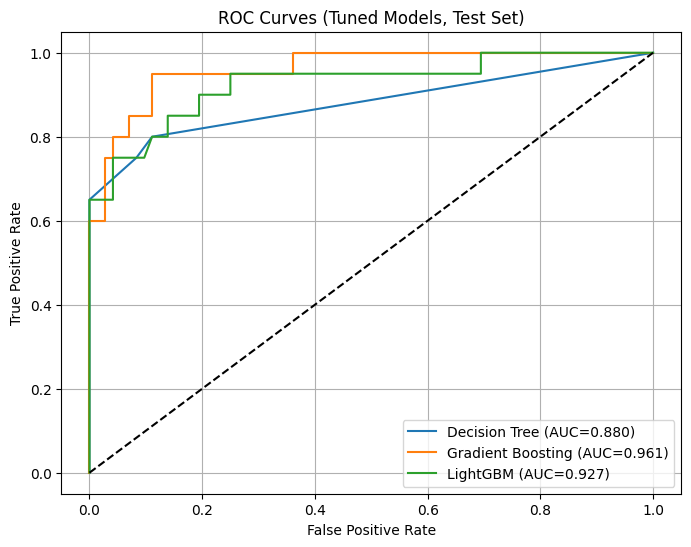

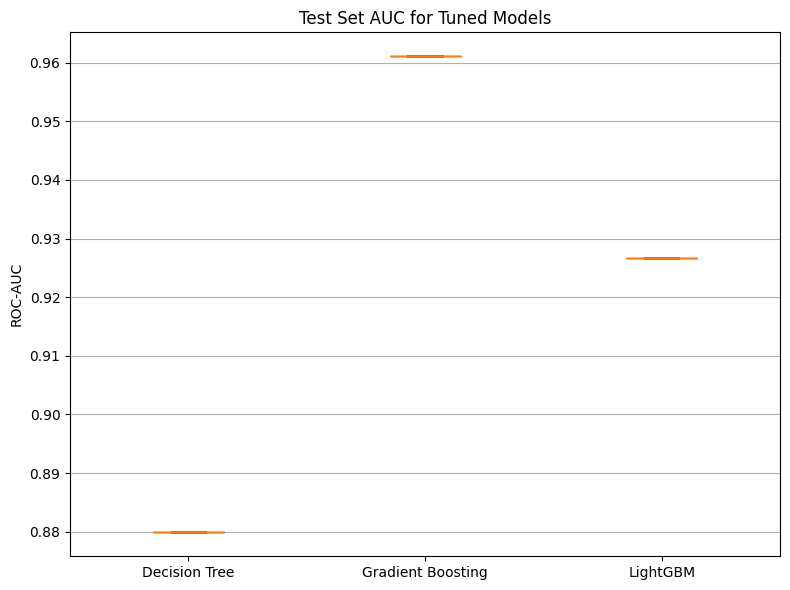

,Model,Accuracy,Sensitivity,Specificity,Precision,F1,MCC,ROC-AUC
0,Decision Tree,0.880,0.75,0.917,0.714,0.732,0.655,0.880
1,Gradient Boosting,0.891,0.60,0.972,0.857,0.706,0.657,0.961
2,LightGBM,0.870,0.75,0.903,0.682,0.714,0.631,0.927


Tuned model metrics saved to tuned_models_metrics.xlsx

Top Tuned Model Based on MCC:


,Model,Accuracy,Sensitivity,Specificity,Precision,F1,MCC,ROC-AUC
1,Gradient Boosting,0.891,0.6,0.972,0.857,0.706,0.657,0.961


In [ ]:
# =================== Imports ===================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# =================== Data ===================
X = df_en.drop("HBsAg_Status", axis=1)
y = df_en["HBsAg_Status"]

# =================== Train/Val/Test Split ===================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=2/3, random_state=42
)


from sklearn.preprocessing import StandardScaler

# =================== Convert all columns to numeric ===================
# Invalid entries will become NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val   = X_val.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# =================== Handle missing values ===================
# Fill NaNs with the median of each column
X_train = X_train.fillna(X_train.median())
X_val   = X_val.fillna(X_train.median())  # Use training median to avoid data leakage
X_test  = X_test.fillna(X_train.median()) # Use training median

# =================== Scaling ===================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


# =================== Scaling ===================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Sanity check
assert X_train_scaled.shape[0] == y_train.shape[0], "Mismatch in X_train and y_train!"

# =================== Baseline Models ===================
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "SVM": SVC(probability=True, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced")
}

# =================== Baseline Evaluation ===================
conf_matrices = {}
metric_summary = {}
roc_data = {}
auc_values = []
model_names = []

for name, model in baseline_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    # Probabilities for ROC/AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_val_scaled)
    else:
        y_proba = None

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices[name] = cm
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Metrics
    metric_summary[name] = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall (Sensitivity)": recall_score(y_val, y_pred),
        "Specificity": specificity,
        "F1 Score": f1_score(y_val, y_pred),
        "MCC": matthews_corrcoef(y_val, y_pred),
        "ROC-AUC": roc_auc_score(y_val, y_proba) if y_proba is not None else None
    }

    # ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_data[name] = (fpr, tpr, roc_auc_score(y_val, y_proba))
        auc_values.append(roc_auc_score(y_val, y_proba))
        model_names.append(name)

# =================== Confusion Matrices ===================
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.title.set_text(name)
plt.suptitle("Confusion Matrices (Validation Set)", fontsize=16)
plt.tight_layout()
plt.show()

# =================== ROC Curves ===================
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Validation Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# =================== AUC Boxplot ===================
plt.figure(figsize=(12, 6))
plt.boxplot([[auc] for auc in auc_values],
            labels=model_names, patch_artist=True,
            boxprops=dict(facecolor="skyblue"))
plt.ylabel("ROC-AUC")
plt.title("Validation AUC for All Models (70/20/10 Split)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# =================== Metrics Table ===================
metrics_df = pd.DataFrame(metric_summary).T.round(3)
display(metrics_df)
metrics_df.to_excel("metrics_summary_70_20_1023ff3f.xlsx")

# =================== Top 3 Models Based on MCC ===================
#top_3_models = metrics_df.sort_values("MCC", ascending=False).head(3)
#print("\nTop 3 Models Based on MCC (Validation Set):")
#display(top_3_models)
#top_3_models.to_excel("top_3_models_70_20_10232f.xlsx")

top_3_models = metrics_df.sort_values(
    by=["MCC", "ROC-AUC"], ascending=False
).head(3)

print("\nTop 3 Models (MCC first, ROC-AUC as tiebreaker) - Validation Set:")
display(top_3_models)

top_3_models.to_excel("top_3_models_70_20_1022ff3.xlsx", index=False)

# =================== Cross-Validated AUC (Optional) ===================
cv_auc_scores = {}
for name, model in baseline_models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    cv_auc_scores[name] = scores

plt.figure(figsize=(8, 6))
plt.boxplot(cv_auc_scores.values(), labels=cv_auc_scores.keys(), patch_artist=True)
plt.ylabel("ROC-AUC")
plt.title("Distribution of ROC-AUC Across CV (Baseline Models)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


# =================== Tuned Models Grid (Example Parameters) ===================
from sklearn.model_selection import GridSearchCV

# =================== Updated Parameter Grids =================== 
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5],
        "criterion": ["gini", "entropy"]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "num_leaves": [31, 50, 100],
        "max_depth": [-1, 5, 10],
        "subsample": [0.8, 1],
        "colsample_bytree": [0.8, 1]
    }
}

# =================== Models for Tuning ===================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

tune_candidates = [
    ("Decision Tree", DecisionTreeClassifier(class_weight="balanced")),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("LightGBM", LGBMClassifier(class_weight="balanced"))
]

tuned_models = {}


# =================== Hyperparameter Tuning ===================
for name, model in tune_candidates:
    grid = GridSearchCV(model, param_grids[name], scoring="roc_auc", cv=5, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    tuned_models[name] = grid.best_estimator_
    print(f"{name} Best Params: {grid.best_params_}")


# =================== Tuned Models Evaluation (Test Set) ===================
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, recall_score, precision_score

# =================== Tuned Models Evaluation (Test Set) ===================
conf_matrices_tuned = {}
roc_data_tuned = {}
auc_values_tuned = []
model_names_tuned = []
metric_summary_tuned = {
    "Model": [], "Accuracy": [], "Sensitivity": [], "Specificity": [],
    "Precision": [], "F1": [], "MCC": [], "ROC-AUC": []
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices_tuned[name] = cm

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)  # Recall for positive class
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store ROC data for plotting later
    roc_data_tuned[name] = (y_test, y_proba)
    auc_values_tuned.append(roc_auc)
    model_names_tuned.append(name)

    # Append metrics to summary
    metric_summary_tuned["Model"].append(name)
    metric_summary_tuned["Accuracy"].append(accuracy)
    metric_summary_tuned["Sensitivity"].append(sensitivity)
    metric_summary_tuned["Specificity"].append(specificity)
    metric_summary_tuned["Precision"].append(precision)
    metric_summary_tuned["F1"].append(f1)
    metric_summary_tuned["MCC"].append(mcc)
    metric_summary_tuned["ROC-AUC"].append(roc_auc)

# Convert metric summary to DataFrame for better viewing

metric_summary_df = pd.DataFrame(metric_summary_tuned)
print(metric_summary_df)

from sklearn.metrics import roc_curve, roc_auc_score

# Store ROC curve data
#u roc_data_tuned[name] = {}
#roc_data_tuned[name]['fpr'], roc_data_tuned[name]['tpr'], _ = roc_curve(y_test, y_proba)
#roc_data_tuned[name]['auc'] = roc_auc_score(y_test, y_proba)




# ROC curve
#fpr, tpr, _ = roc_curve(y_test, y_proba)
#roc_data_tuned[name] = (fpr, tpr, roc_auc_score(y_test, y_proba))
#auc_values_tuned.append(roc_auc_score(y_test, y_proba))
#model_names_tuned.append(name)


# =================== Confusion Matrices (Tuned Models) ===================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, cm) in zip(axes, conf_matrices_tuned.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

# =================== ROC Curves (Tuned Models) ===================
from sklearn.metrics import roc_curve, roc_auc_score

roc_data_tuned = {}

for name, model in tuned_models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    roc_data_tuned[name] = (fpr, tpr, auc_score)




plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_data_tuned.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Tuned Models, Test Set)")
plt.legend()
plt.grid(True)
plt.show()

# =================== AUC Boxplot (Tuned Models) ===================
plt.figure(figsize=(8, 6))
plt.boxplot([[auc] for auc in auc_values_tuned],
            labels=model_names_tuned, patch_artist=True,
            boxprops=dict(facecolor="skyblue"))
plt.ylabel("ROC-AUC")
plt.title("Test Set AUC for Tuned Models")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# =================== Metrics Table (Tuned Models) ===================
df_metrics_tuned = pd.DataFrame(metric_summary_tuned).round(3)
display(df_metrics_tuned)
df_metrics_tuned.to_excel("tuned_models_metrics22f.xlsx", index=False)
print("Tuned model metrics saved to tuned_models_metrics.xlsx")

# =================== Top Tuned Model by MCC ===================
top_tuned_model = df_metrics_tuned.sort_values("MCC", ascending=False).head(1)
print("\nTop Tuned Model Based on MCC:")
display(top_tuned_model)


## SHAP for Baseline

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# =================== Step 1: Encode categorical features ===================
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_train_scaled_encoded = StandardScaler().fit_transform(X_train_encoded)  # for models that need scaling

# =================== Step 2: Define top 3 models ===================
#baseline_top3_models = {
#    "Decision Tree": models["Decision Tree"],
#    "Gradient Boosting": models["Gradient Boosting"],
#     "LightGBM": models["LightGBM"]
    
#}

# =================== Step 2: Define top 3 models ===================
baseline_top3_models = {
    "Decision Tree": baseline_models["Decision Tree"],
    "Gradient Boosting": baseline_models["Gradient Boosting"],
    "LightGBM": baseline_models["LightGBM"]
}

# Tuned top 3 models (already tuned)
tuned_top3_models = {
    "Decision Tree": tuned_models["Decision Tree"],
    "Gradient Boosting": tuned_models["Gradient Boosting"],
    "LightGBM": tuned_models["LightGBM"]
}


tuned_top3_models = tuned_models  # already tuned and stored

# =================== Step 3: SHAP Bar Plots ===================
def plot_shap_bar(model, X_data, feature_names, figure_label, title, filename_prefix):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_data)

    # Handle multi-class SHAP output if exists
    if len(shap_values.values.shape) == 3:
        shap_vals_2d = shap_values.values[:, :, 0]
    else:
        shap_vals_2d = shap_values.values

    shap_abs_mean = pd.DataFrame({
        "Feature": feature_names,
        "MeanSHAP": np.abs(shap_vals_2d).mean(axis=0)
    }).sort_values(by="MeanSHAP", ascending=True)

    # Take top 15 features
    shap_abs_mean_top15 = shap_abs_mean.tail(15)

    plt.figure(figsize=(8, 6))
    plt.barh(shap_abs_mean_top15["Feature"], shap_abs_mean_top15["MeanSHAP"], color="blue")

    # Add figure label
    plt.text(-0.05, 1.02, figure_label, transform=plt.gca().transAxes,
             fontsize=16, fontweight="bold", va="top", ha="left")

    plt.xlabel("Mean |SHAP Value|", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{filename_prefix}_{figure_label}.pdf")
    plt.savefig(f"{filename_prefix}_{figure_label}.png")
    plt.close()

# Baseline Top 3 - labels N, P, Q
baseline_labels = ["N", "P", "Q"]
for label, (name, model) in zip(baseline_labels, baseline_top3_models.items()):
    plot_shap_bar(model, X_train_encoded, X_train_encoded.columns,
                  label, f"Top 15 Feature Importance (SHAP) for {name} - Baseline",
                  "SHAP_Baseline")

# Tuned Top 3 - labels X, Y, Z
tuned_labels = ["X", "Y", "Z"]
for label, (name, model) in zip(tuned_labels, tuned_top3_models.items()):
    plot_shap_bar(model, X_train_scaled_encoded, X_train_encoded.columns,
                  label, f"Top 15 Feature Importance (SHAP) for {name} - Tuned",
                  "SHAP_Tuned")


## With CV still on imbalanced dataset 

# improved 2

In [ ]:
# ================== Imports ==================
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
)
from sklearn.utils import resample

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import shap

# ================== Global Seed ==================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ================== Load Features & Target ==================
X = df_en.drop("HBsAg_Status", axis=1)
y = df_en["HBsAg_Status"]

# ================== Step 1: Clean & Convert to Numeric ==================
X = X.applymap(lambda x: str(x).replace('..', '.').strip() if isinstance(x, str) else x)
X = X.apply(pd.to_numeric, errors='coerce')

# ================== Step 2: Impute Missing Values ==================
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# ================== Step 3: Scale Features ==================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print("Data cleaning, imputation, and scaling completed. Shape:", X_scaled.shape)

# ================== Step 4: Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=SEED
)

# ================== Define Models ==================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=SEED),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=SEED),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED),
    "LightGBM": LGBMClassifier(random_state=SEED),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=SEED),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=SEED)
}

# ================== Bootstrap CI Function ==================
def bootstrap_ci(metric_fn, y_true, y_pred, n_iterations=1000):
    scores = []
    data = list(zip(y_true, y_pred))
    for _ in range(n_iterations):
        sample = resample(data, replace=True, n_samples=len(data))
        y_s, y_p = zip(*sample)
        try:
            scores.append(metric_fn(y_s, y_p))
        except:
            continue
    return np.mean(scores), np.percentile(scores, 2.5), np.percentile(scores, 97.5)

# ================== Cross-Validation & Metrics ==================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
roc_data, metric_summary, auc_per_model = {}, {}, {}

for name, model in models.items():
    y_true_all, y_prob_all, y_pred_all = [], [], []
    fold_aucs = []

    for train_idx, val_idx in cv.split(X_scaled, y):
        X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)
        y_pred = (y_prob >= 0.5).astype(int)

        y_true_all.extend(y_val)
        y_prob_all.extend(y_prob)
        y_pred_all.extend(y_pred)
        fold_aucs.append(roc_auc_score(y_val, y_prob))

    auc_per_model[name] = fold_aucs

    # ROC data
    fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
    auc = roc_auc_score(y_true_all, y_prob_all)
    roc_data[name] = (fpr, tpr, auc)

    # Metrics with bootstrap CI
    acc_mean, acc_low, acc_high = bootstrap_ci(accuracy_score, y_true_all, y_pred_all)
    prec_mean, prec_low, prec_high = bootstrap_ci(lambda y,yhat: precision_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    sens_mean, sens_low, sens_high = bootstrap_ci(lambda y,yhat: recall_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    spec_mean, spec_low, spec_high = bootstrap_ci(lambda y,yhat: recall_score(y,yhat,pos_label=0), y_true_all, y_pred_all)
    f1_mean, f1_low, f1_high = bootstrap_ci(lambda y,yhat: f1_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    mcc_mean, mcc_low, mcc_high = bootstrap_ci(matthews_corrcoef, y_true_all, y_pred_all)
    roc_auc_mean, roc_auc_low, roc_auc_high = bootstrap_ci(roc_auc_score, y_true_all, y_prob_all)

    metric_summary[name] = {
        "AUC": round(auc,2),
        "Accuracy (95% CI)": f"{acc_mean:.2f} ({acc_low:.2f}, {acc_high:.2f})",
        "Precision (95% CI)": f"{prec_mean:.2f} ({prec_low:.2f}, {prec_high:.2f})",
        "Sensitivity (95% CI)": f"{sens_mean:.2f} ({sens_low:.2f}, {sens_high:.2f})",
        "Specificity (95% CI)": f"{spec_mean:.2f} ({spec_low:.2f}, {spec_high:.2f})",
        "F1 Score (95% CI)": f"{f1_mean:.2f} ({f1_low:.2f}, {f1_high:.2f})",
        "MCC (95% CI)": f"{mcc_mean:.2f} ({mcc_low:.2f}, {mcc_high:.2f})",
        "ROC_AUC (95% CI)": f"{roc_auc_mean:.2f} ({roc_auc_low:.2f}, {roc_auc_high:.2f})"
    }
    
    # Save metrics
metrics_df = pd.DataFrame(metric_summary).T
metrics_df.to_excel("metrics_summarycv2f.xlsx")

# ================== Confusion Matrices (All Models) ==================
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

# ================== ROC Curve (All Models) ==================
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curves with Cross-Validation (All Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ================== AUC Boxplot (All Models) ==================
plt.figure(figsize=(12, 6))
plt.boxplot(auc_per_model.values(), labels=auc_per_model.keys(), vert=True, patch_artist=True)
plt.ylabel("AUC Score")
plt.title("AUC Distribution per Model (5-Fold CV)")
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== Save Metrics ==================
metrics_df = pd.DataFrame(metric_summary).T
metrics_df["MCC_mean"] = metrics_df["MCC (95% CI)"].apply(lambda x: float(x.split()[0]))
metrics_df["ROC_AUC_mean"] = metrics_df["ROC_AUC (95% CI)"].apply(lambda x: float(x.split()[0]))

# Exclude CatBoost if present
metrics_df = metrics_df[metrics_df.index != "CatBoost"]

# Top 3 selection by MCC, ROC-AUC tie breaker
top_3_models = metrics_df.sort_values(by=["MCC_mean","ROC_AUC_mean"], ascending=False).head(3)
print(top_3_models)

roc_data_top3 = {name: roc_data[name] for name in top_3_models.index}
auc_per_model_top3 = {name: auc_per_model[name] for name in top_3_models.index}
metric_summary_top3 = {name: metric_summary[name] for name in top_3_models.index}

metrics_df_top3 = pd.DataFrame(metric_summary_top3).T
metrics_df_top3.to_excel("metrics_summary_top333f.xlsx")



# ================== Hyperparameter grids ==================
param_grids = {
    "Gradient Boosting": {
        "n_estimators": [100,200,500],
        "learning_rate": [0.01,0.05,0.1,0.2],
        "max_depth": [3,5,7],
        "subsample": [0.6,0.8,1.0]
    },
    "LightGBM": {
        "n_estimators": [100,200,500],
        "learning_rate": [0.01,0.05,0.1],
        "num_leaves": [31,50,100],
        "max_depth": [-1,5,10]
    },
    "XGBoost": {
        "n_estimators": [100,200,500,1000],
        "learning_rate": [0.01,0.05,0.1,0.2],
        "max_depth": [3,5,7,10],
        "subsample": [0.6,0.8,1.0],
        "colsample_bytree": [0.6,0.8,1.0],
        "gamma": [0,0.1,0.3,0.5],
        "reg_lambda": [1,5,10],
        "reg_alpha": [0,0.1,1]
    }
}

# ================== Tune Top 3 Models ==================
tuned_models = {}
for name in ["Gradient Boosting", "LightGBM", "XGBoost"]:
    print(f"Tuning {name}...")
    model = models[name]
    param_grid = param_grids[name]

    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
        verbose=1,
        n_jobs=-1,
        random_state=SEED
    )
    search.fit(X_scaled, y)
    print(f"Best params for {name}: {search.best_params_}")
    tuned_models[name] = search.best_estimator_

# ================== Evaluate Tuned Models ==================
roc_data_tuned, metric_summary_tuned, auc_per_model_tuned = {}, {}, {}

for name, model in tuned_models.items():
    y_true_all, y_prob_all, y_pred_all = [], [], []
    fold_aucs = []

    for train_idx, val_idx in cv.split(X_scaled, y):
        X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_prob = model.predict_proba(X_val)[:,1] if hasattr(model,"predict_proba") else model.decision_function(X_val)
        y_pred = (y_prob>=0.5).astype(int)

        y_true_all.extend(y_val)
        y_prob_all.extend(y_prob)
        y_pred_all.extend(y_pred)
        fold_aucs.append(roc_auc_score(y_val, y_prob))

    auc_per_model_tuned[name] = fold_aucs
    fpr, tpr, auc = roc_curve(y_true_all,y_prob_all)[0], roc_curve(y_true_all,y_prob_all)[1], roc_auc_score(y_true_all,y_prob_all)
    roc_data_tuned[name] = (fpr, tpr, auc)

    acc_mean, acc_low, acc_high = bootstrap_ci(accuracy_score, y_true_all, y_pred_all)
    prec_mean, prec_low, prec_high = bootstrap_ci(lambda y,yhat: precision_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    sens_mean, sens_low, sens_high = bootstrap_ci(lambda y,yhat: recall_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    spec_mean, spec_low, spec_high = bootstrap_ci(lambda y,yhat: recall_score(y,yhat,pos_label=0), y_true_all, y_pred_all)
    f1_mean, f1_low, f1_high = bootstrap_ci(lambda y,yhat: f1_score(y,yhat,pos_label=1), y_true_all, y_pred_all)
    mcc_mean, mcc_low, mcc_high = bootstrap_ci(matthews_corrcoef, y_true_all, y_pred_all)
    roc_auc_mean, roc_auc_low, roc_auc_high = bootstrap_ci(roc_auc_score, y_true_all, y_prob_all)

    metric_summary_tuned[name] = {
        "AUC": round(auc,2),
        "Accuracy (95% CI)": f"{acc_mean:.2f} ({acc_low:.2f}, {acc_high:.2f})",
        "Precision (95% CI)": f"{prec_mean:.2f} ({prec_low:.2f}, {prec_high:.2f})",
        "Sensitivity (95% CI)": f"{sens_mean:.2f} ({sens_low:.2f}, {sens_high:.2f})",
        "Specificity (95% CI)": f"{spec_mean:.2f} ({spec_low:.2f}, {spec_high:.2f})",
        "F1 Score (95% CI)": f"{f1_mean:.2f} ({f1_low:.2f}, {f1_high:.2f})",
        "MCC (95% CI)": f"{mcc_mean:.2f} ({mcc_low:.2f}, {mcc_high:.2f})",
        "ROC_AUC (95% CI)": f"{roc_auc_mean:.2f} ({roc_auc_low:.2f}, {roc_auc_high:.2f})"
    }

metrics_df_tuned = pd.DataFrame(metric_summary_tuned).T
metrics_df_tuned.to_excel("metrics_summary_top3_tuned12f.xlsx")

# ================== Confusion Matrices (Top 3 Tuned) ==================
fig, axes = plt.subplots(1,3,figsize=(18,5))
for ax,(name, model) in zip(axes, tuned_models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"{name} (Tuned)", fontsize=14)
plt.tight_layout()
plt.show()

# ================== ROC Curves (Top 3 Tuned) ==================
plt.figure(figsize=(10,8))
for name,(fpr,tpr,auc) in roc_data_tuned.items():
    plt.plot(fpr,tpr,label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--',label="Random Guess")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curves Top 3 Tuned Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ================== AUC Boxplot (Top 3 Tuned) ==================
plt.figure(figsize=(10,6))
plt.boxplot(auc_per_model_tuned.values(), labels=auc_per_model_tuned.keys(), vert=True, patch_artist=True)
plt.ylabel("AUC Score")
plt.title("AUC Distribution per Top 3 Tuned Models (5-Fold CV)")
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jnabateesa\AppData\Local\Temp\ipykernel_12468\58250022.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: str(x).replace('..', '.').strip() if isinstance(x, str) else x)


Data cleaning, imputation, and scaling completed. Shape: (459, 66)


c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:4

[LightGBM] [Info] Number of positive: 80, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 367, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217984 -> initscore=-1.277456
[LightGBM] [Info] Start training from score -1.277456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [164]:
import shap
from matplotlib.backends.backend_pdf import PdfPages

# Scale features
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Models in order for before and after tuning
plot_order = [
    ("Gradient Boosting", models["Gradient Boosting"], "Before Tuning", "H"),
    ("LightGBM", models["LightGBM"], "Before Tuning", "I"),
    ("XGBoost", models["XGBoost"], "Before Tuning", "J"),
    ("Gradient Boosting", tuned_models["Gradient Boosting"], "After Tuning", "K"),
    ("LightGBM", tuned_models["LightGBM"], "After Tuning", "L"),
    ("XGBoost", tuned_models["XGBoost"], "After Tuning", "M"),
]

with PdfPages("SHAP_Feature_Importance.pdf") as pdf:
    for model_name, model, stage, label in plot_order:
        # Fit model
        model.fit(X_df, y)
        
        # SHAP explainer
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_df)

        # For binary classification (LightGBM & XGBoost return list)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

        # ========= Summary Plot =========
        plt.figure(figsize=(8, 6))
        shap.summary_plot(
            shap_values, X_df, plot_type="bar", show=False, max_display=15
        )
        plt.xlabel("Mean |SHAP Value|", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.title(f"Feature Importance (SHAP) for {model_name} ({stage})", fontsize=14)
        plt.text(
            -0.1, 1.05, label, transform=plt.gca().transAxes,
            fontsize=16, fontweight="bold", va="top"
        )
        plt.tight_layout()
        pdf.savefig(bbox_inches="tight")
        plt.close()

        # ========= Interaction Summary Plot =========
        #try:
        #    interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_df)

        #    plt.figure(figsize=(8, 6))
        #    shap.summary_plot(
        #        interaction_values, X_df, show=False, max_display=15
        #    )
        #    plt.title(f"SHAP Interaction Summary for {model_name} ({stage})", fontsize=14)
        #    plt.tight_layout()
        #    pdf.savefig(bbox_inches="tight")
        #    plt.close()
        #except Exception as e:
        #    print(f"⚠️ Skipping interaction plot for {model_name} ({stage}): {e}")

print("✅ Saved all SHAP + Interaction plots into SHAP_Feature_Importance.pdf")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Saved all SHAP + Interaction plots into SHAP_Feature_Importance.pdf


## Cross Validation , SMOTE and SHAP


c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:09:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:09:3

[LightGBM] [Info] Number of positive: 287, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3515
[LightGBM] [Info] Number of data points in the train set: 574, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

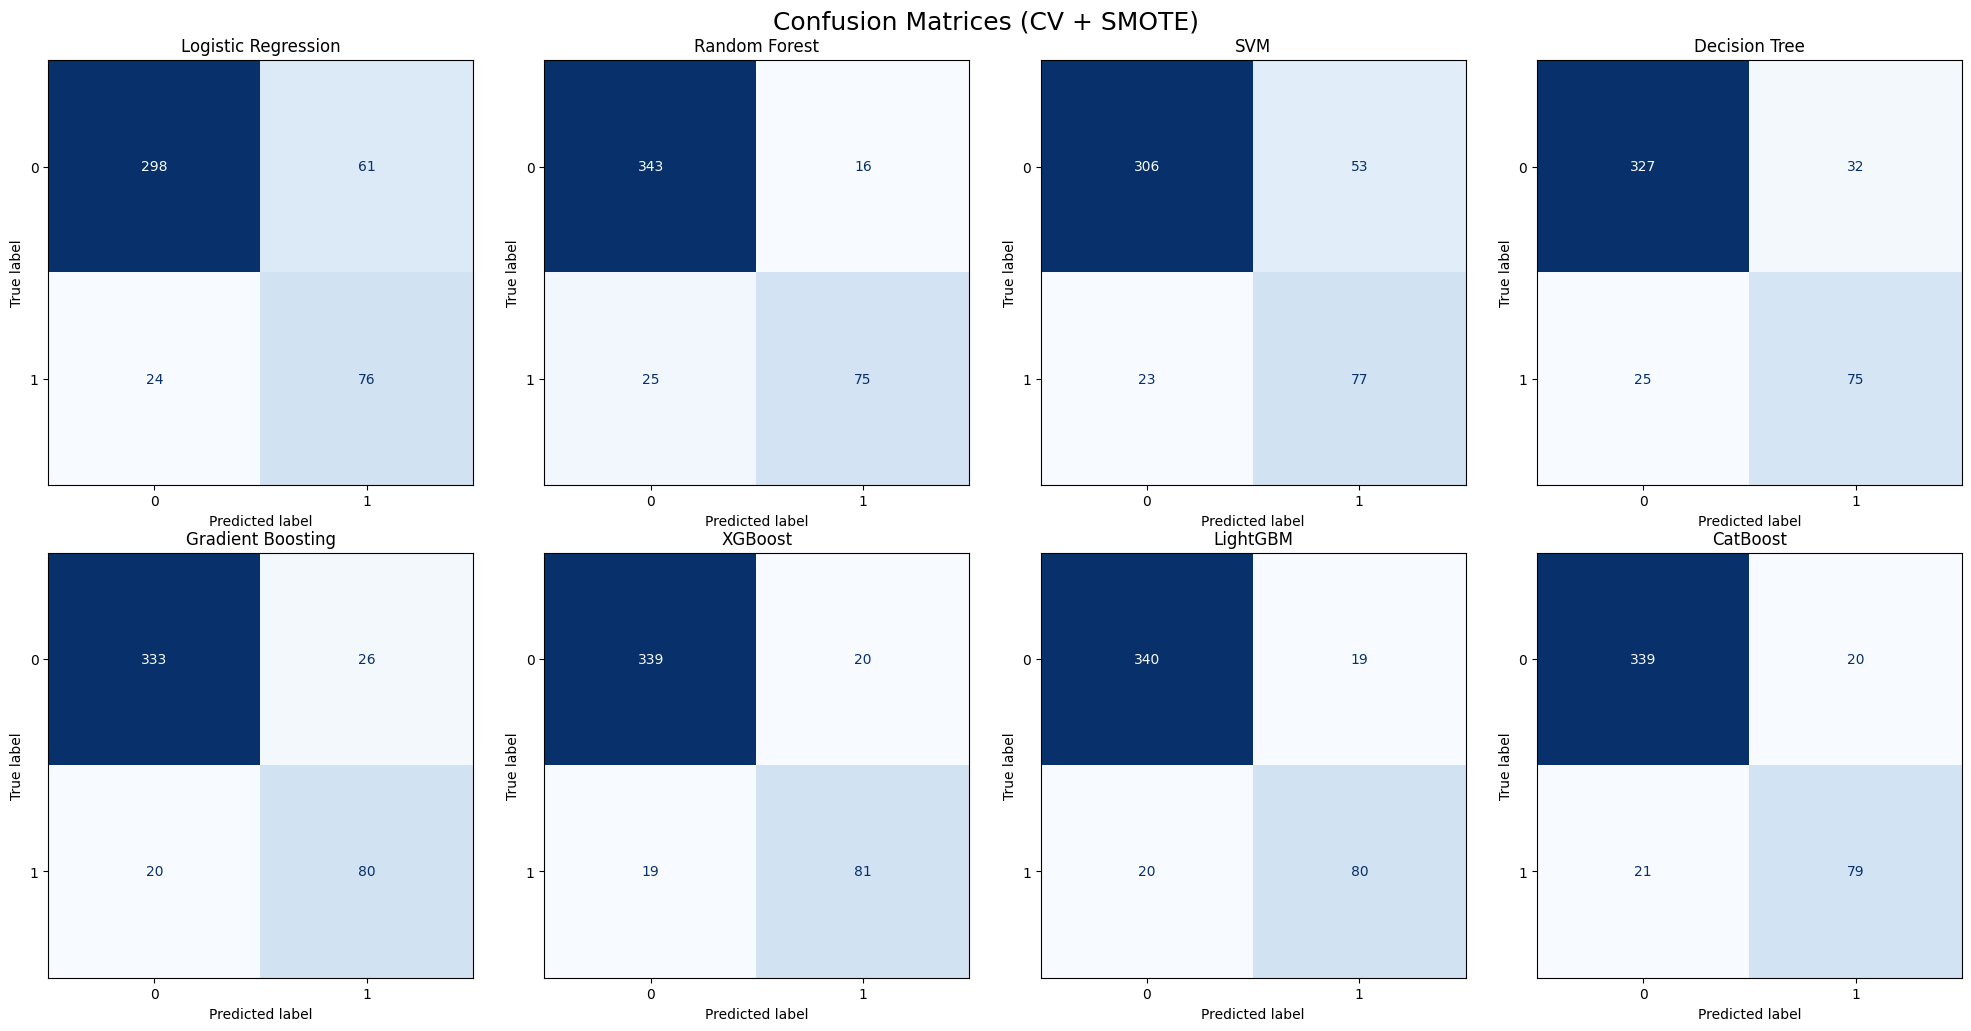

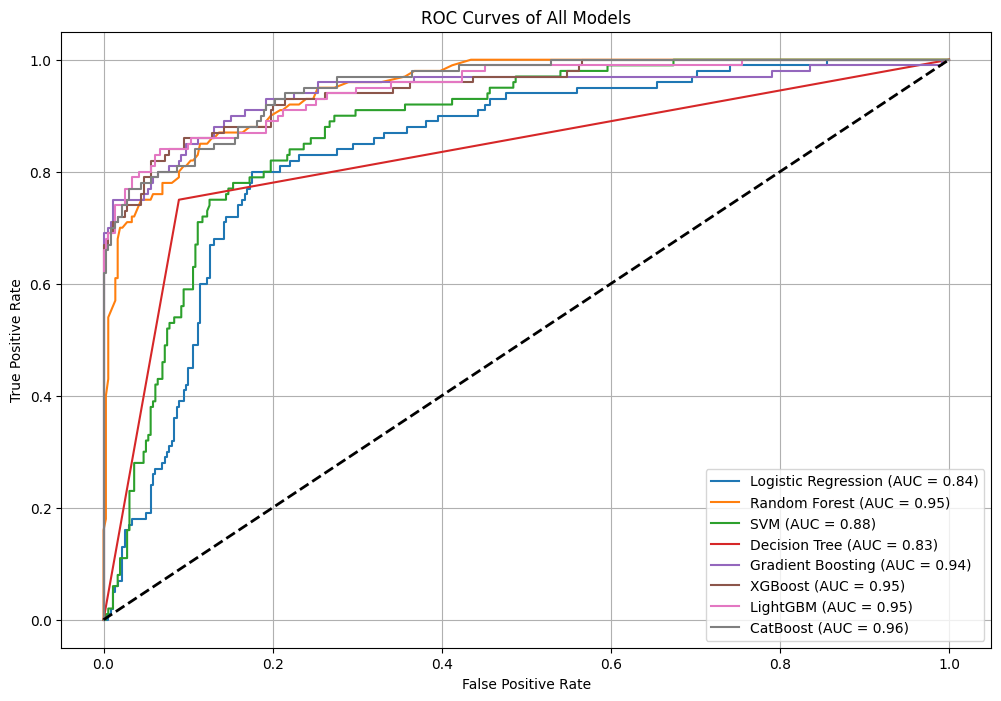

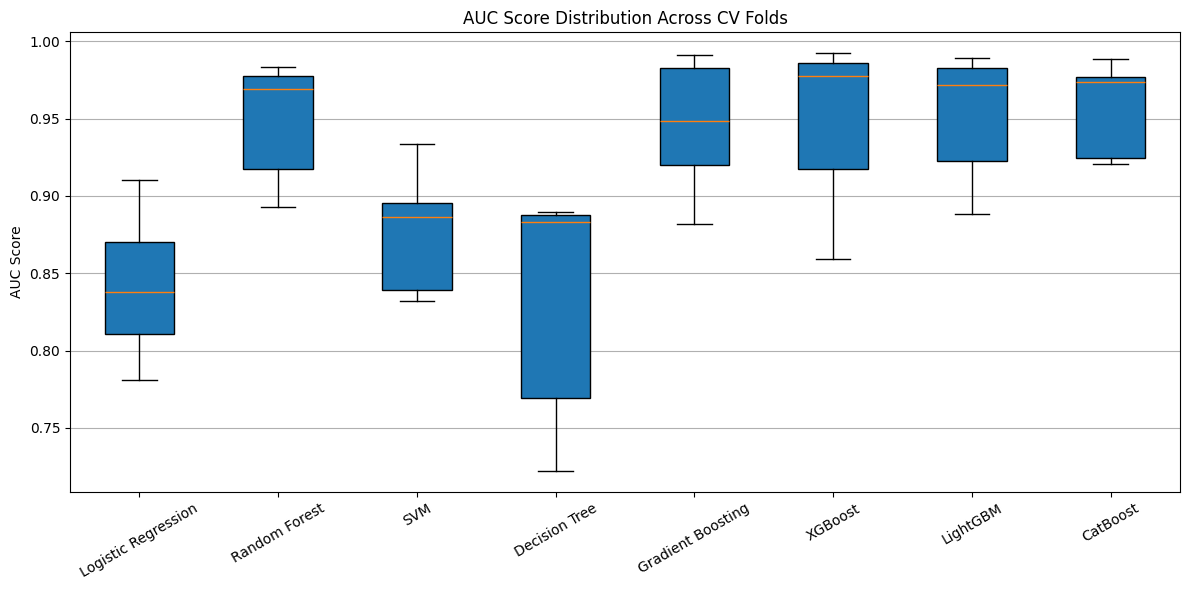


Model Ranking:
                 Model  MCC (mean)  ROC AUC (mean)
5              XGBoost    0.753333        0.946465
6             LightGBM    0.751610        0.951033
7             CatBoost    0.744842        0.957011
1        Random Forest    0.730251        0.948062
4    Gradient Boosting    0.720649        0.944857
3        Decision Tree    0.645253        0.830458
2                  SVM    0.572892        0.877177
0  Logistic Regression    0.536722        0.842140

Top 3 Models:
      Model  MCC (mean)  ROC AUC (mean)
5   XGBoost    0.753333        0.946465
6  LightGBM    0.751610        0.951033
7  CatBoost    0.744842        0.957011
[LightGBM] [Info] Number of positive: 80, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 367, number of used features: 

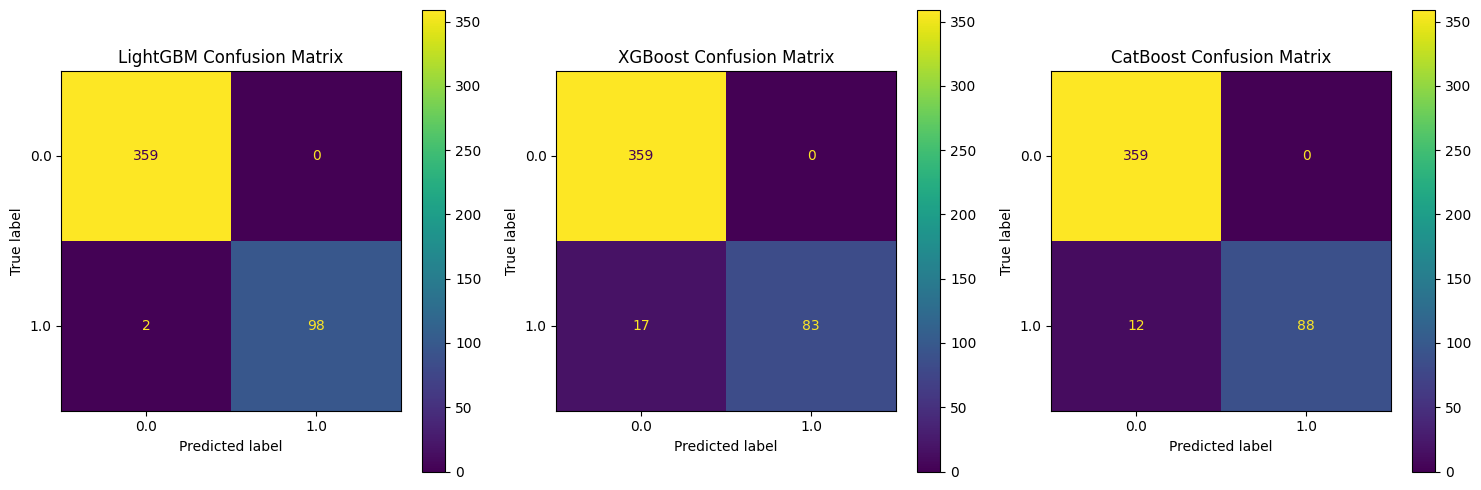

[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

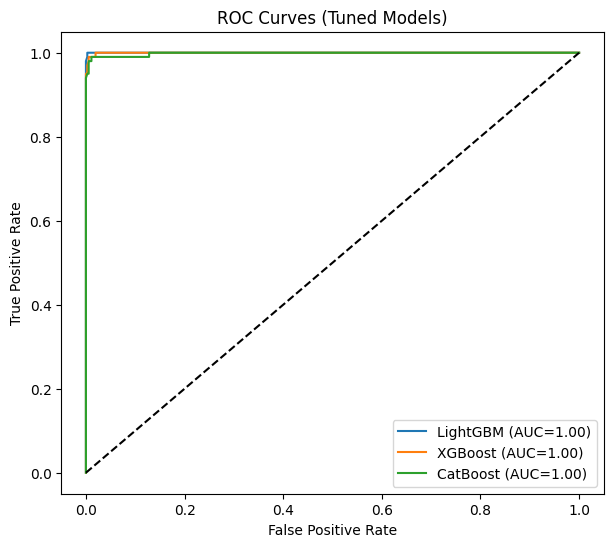

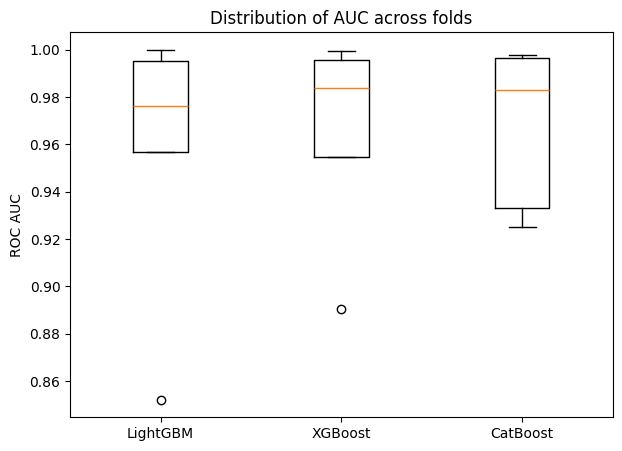


=== Tuned Models Metrics Summary ===
           AUC  Accuracy (95% CI) Precision (95% CI) Sensitivity (95% CI)  \
LightGBM  0.96  0.95 (0.91, 0.98)  0.96 (0.91, 1.01)    0.79 (0.65, 0.93)   
XGBoost   0.96  0.94 (0.91, 0.97)  1.00 (1.00, 1.00)    0.73 (0.59, 0.87)   
CatBoost  0.97  0.94 (0.91, 0.96)  0.94 (0.91, 0.97)    0.76 (0.65, 0.87)   

         Specificity (95% CI)  F1 Score (95% CI)       MCC (95% CI)  \
LightGBM    0.99 (0.98, 1.00)  0.86 (0.77, 0.96)  0.84 (0.74, 0.95)   
XGBoost     1.00 (1.00, 1.00)  0.84 (0.74, 0.93)  0.82 (0.73, 0.92)   
CatBoost    0.99 (0.98, 0.99)  0.84 (0.77, 0.90)  0.81 (0.73, 0.88)   

           ROC AUC (95% CI)  
LightGBM  0.96 (0.90, 1.01)  
XGBoost   0.96 (0.93, 1.00)  
CatBoost  0.97 (0.94, 1.00)  


In [69]:

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve,
    accuracy_score,precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


import pandas as pd

# ----------------------- Clean numeric data -----------------------
def clean_numeric_dataframe(df):
    df_clean = df.copy()
    df_clean = df_clean.replace(r'[<>]', '', regex=True)  # remove < and >
    df_clean = df_clean.apply(pd.to_numeric, errors='coerce')  # convert to numeric
    df_clean = df_clean.fillna(df_clean.median())  # fill NaN with median
    return df_clean

# ----------------------- Data -----------------------
X = clean_numeric_dataframe(df_en.drop('HBsAg_Status', axis=1))
y = df_en['HBsAg_Status'].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# -----------------------
#  Define models
# -----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------
#  Storage
# -----------------------
metrics_per_fold = {}
metric_summary = {}
conf_matrices = {}
roc_curves = {}
auc_per_model = {}

# -----------------------
#  CV + SMOTE + Metrics
# -----------------------
for name, model in models.items():
    metrics_per_fold[name] = {'Accuracy': [], 'Precision':[],'Sensitivity': [], 'Specificity': [], 'F1': [], 'MCC': [], 'ROC_AUC': []}
    y_true_all, y_pred_all, y_proba_all = [], [], []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline = ImbPipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Store metrics per fold
        metrics_per_fold[name]['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics_per_fold[name]['Precision'].append(precision_score(y_test, y_pred))
        metrics_per_fold[name]['Sensitivity'].append(recall_score(y_test, y_pred))
        metrics_per_fold[name]['Specificity'].append(tn / (tn + fp))
        metrics_per_fold[name]['F1'].append(f1_score(y_test, y_pred))
        metrics_per_fold[name]['MCC'].append(matthews_corrcoef(y_test, y_pred))
        metrics_per_fold[name]['ROC_AUC'].append(roc_auc_score(y_test, y_proba))

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)

    # Confusion matrix for all folds combined
    conf_matrices[name] = confusion_matrix(y_true_all, y_pred_all)

    # ROC curve for all folds combined
    fpr, tpr, _ = roc_curve(y_true_all, y_proba_all)
    roc_curves[name] = (fpr, tpr, np.mean(metrics_per_fold[name]['ROC_AUC']))

    # Store per-fold AUC for boxplot
    auc_per_model[name] = metrics_per_fold[name]['ROC_AUC']

    # Compute mean ± 95% CI
    def mean_ci(values):
        mean_val = np.mean(values)
        std_val = np.std(values, ddof=1)
        ci_low = mean_val - 1.96 * std_val / np.sqrt(len(values))
        ci_high = mean_val + 1.96 * std_val / np.sqrt(len(values))
        return mean_val, ci_low, ci_high

    acc_mean, acc_low, acc_high = mean_ci(metrics_per_fold[name]['Accuracy'])
    prec_mean, prec_low, prec_high = mean_ci(metrics_per_fold[name]['Precision'])
    sens_mean, sens_low, sens_high = mean_ci(metrics_per_fold[name]['Sensitivity'])
    spec_mean, spec_low, spec_high = mean_ci(metrics_per_fold[name]['Specificity'])
    f1_mean, f1_low, f1_high = mean_ci(metrics_per_fold[name]['F1'])
    mcc_mean, mcc_low, mcc_high = mean_ci(metrics_per_fold[name]['MCC'])
    roc_mean, roc_low, roc_high = mean_ci(metrics_per_fold[name]['ROC_AUC'])

    # Save metrics in the requested format
    metric_summary[name] = {
        "Accuracy (95% CI)": f"{acc_mean:.2f} ({acc_low:.2f}, {acc_high:.2f})",
        "Precision (95% CI)": f"{prec_mean:.2f} ({prec_low:.2f}, {prec_high:.2f})",
        "Sensitivity (95% CI)": f"{sens_mean:.2f} ({sens_low:.2f}, {sens_high:.2f})",
        "Specificity (95% CI)": f"{spec_mean:.2f} ({spec_low:.2f}, {spec_high:.2f})",
        "F1 Score (95% CI)": f"{f1_mean:.2f} ({f1_low:.2f}, {f1_high:.2f})",
        "MCC (95% CI)": f"{mcc_mean:.2f} ({mcc_low:.2f}, {mcc_high:.2f})",
        "ROC AUC (95% CI)": f"{roc_mean:.2f} ({roc_low:.2f}, {roc_high:.2f})"
    }

# -----------------------
#  Save metrics table
# -----------------------
metrics_df = pd.DataFrame(metric_summary).T
metrics_df.to_excel("metrics_summary_with_CIfinal44522f.xlsx")
print(metrics_df)

# -----------------------
#  Plot Confusion Matrices
# -----------------------
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, (name, cm) in enumerate(conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], colorbar=False, cmap='Blues')
    axes[idx].set_title(name)
plt.tight_layout()
plt.suptitle("Confusion Matrices (CV + SMOTE)", fontsize=18, y=1.02)
plt.show()

# -----------------------
#  Plot ROC Curves
# -----------------------
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, mean_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# -----------------------
#  Plot AUC Boxplot
# -----------------------
plt.figure(figsize=(12, 6))
plt.boxplot(auc_per_model.values(), labels=auc_per_model.keys(), patch_artist=True)
plt.ylabel("AUC Score")
plt.title("AUC Score Distribution Across CV Folds")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -----------------------
#  Rank models and pick top 3
# -----------------------
ranking_data = []
for name in models.keys():
    roc_mean = np.mean(metrics_per_fold[name]['MCC'])
    mcc_mean = np.mean(metrics_per_fold[name]['ROC_AUC'])
    ranking_data.append((name, roc_mean, mcc_mean))

ranking_df = pd.DataFrame(ranking_data, columns=['Model', 'MCC (mean)', 'ROC AUC (mean)'])
ranking_df = ranking_df.sort_values(by=['MCC (mean)', 'ROC AUC (mean)'], ascending=False)
print("\nModel Ranking:")
print(ranking_df)

top3 = ranking_df.head(3)
print("\nTop 3 Models:")
print(top3)
top3.to_excel("top3_models_summary4555ff.xlsx")



# ================== Functions ==================
def compute_metrics_with_ci(model, X, y, cv):
    """Cross-validate model and return multiple metrics with 95% CI"""
    acc_scores,prec_scores, sens_scores, spec_scores, f1_scores, mcc_scores, auc_scores = [], [], [], [], [], [],[]

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred))
        sens_scores.append(recall_score(y_test, y_pred))  # sensitivity
        spec_scores.append(tn / (tn + fp))                # specificity
        f1_scores.append(f1_score(y_test, y_pred))
        mcc_scores.append(matthews_corrcoef(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_prob))

    def mean_ci(scores):
        mean = np.mean(scores)
        ci95 = 1.96 * np.std(scores, ddof=1) / np.sqrt(len(scores))
        return mean, (mean - ci95, mean + ci95)

    return {
        "Accuracy": mean_ci(acc_scores),
        "Precision": mean_ci(prec_scores),
        "Sensitivity": mean_ci(sens_scores),
        "Specificity": mean_ci(spec_scores),
        "F1": mean_ci(f1_scores),
        "MCC": mean_ci(mcc_scores),
        "ROC-AUC": mean_ci(auc_scores)
    }, {
        "Accuracy_scores": acc_scores,
        "Precision_scores": prec_scores,
        "Sensitivity_scores": sens_scores,
        "Specificity_scores": spec_scores,
        "F1_scores": f1_scores,
        "MCC_scores": mcc_scores,
        "AUC_scores": auc_scores
    }

def tune_model(model, param_grid, X, y, scoring='roc_auc'):
    """Randomized hyperparameter tuning"""
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,
        scoring=scoring,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )
    search.fit(X, y)
    return search.best_estimator_, search.best_params_

# ================== Example Run ==================
# Assume your data is in X, y (NumPy arrays)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models
models = {
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

# 1) Evaluate baseline
results = {}
for name, model in models.items():
    summary, raw_scores = compute_metrics_with_ci(model, X_scaled, y, cv)
    results[name] = {"summary": summary, "raw": raw_scores}

# Pick top 3 by MCC
top3 = sorted(results.items(), key=lambda x: x[1]["summary"]["MCC"][0], reverse=True)[:3]
print("Top 3 models by MCC:", [m[0] for m in top3])

# 2) Tune hyperparameters
cat_params = {
    'iterations': [200, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
lgbm_params = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [-1, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 30]
}
xgb_params = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

param_spaces = {"CatBoost": cat_params, "LightGBM": lgbm_params, "XGBoost": xgb_params}

tuned_models = {}
for name, _ in top3:
    model = models[name]
    best_model, best_params = tune_model(model, param_spaces[name], X_scaled, y)
    tuned_models[name] = best_model
    print(f"{name} tuned params: {best_params}")

# 3) Re-evaluate tuned models
tuned_results = {}
for name, model in tuned_models.items():
    summary, raw_scores = compute_metrics_with_ci(model, X_scaled, y, cv)
    tuned_results[name] = {"summary": summary, "raw": raw_scores}

# 4a) Confusion matrices (side-by-side)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, model) in zip(axes, tuned_models.items()):
    model.fit(X_scaled, y)  # train on full data
    y_pred = model.predict(X_scaled)
    ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.show()

# 4b) ROC curves
plt.figure(figsize=(7, 6))
for name, model in tuned_models.items():
    model.fit(X_scaled, y)
    y_prob = model.predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc = roc_auc_score(y, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Tuned Models)")
plt.legend()
plt.show()


# 4c) AUC boxplot
plt.figure(figsize=(7, 5))
data = [vals["raw"]["AUC_scores"] for vals in tuned_results.values()]
labels = list(tuned_results.keys())
plt.boxplot(data, labels=labels)
plt.ylabel("ROC AUC")
plt.title("Distribution of AUC across folds")
plt.show()

# ================== Build metrics summary table for tuned models ==================
tuned_metrics_summary = {}

for name, res in tuned_results.items():
    tuned_metrics_summary[name] = {
        "AUC": f"{res['summary']['ROC-AUC'][0]:.2f}",
        "Accuracy (95% CI)": f"{res['summary']['Accuracy'][0]:.2f} ({res['summary']['Accuracy'][1][0]:.2f}, {res['summary']['Accuracy'][1][1]:.2f})",
        "Precision (95% CI)": f"{res['summary']['Precision'][0]:.2f} ({res['summary']['Precision'][1][0]:.2f}, {res['summary']['Precision'][1][1]:.2f})", 
        "Sensitivity (95% CI)": f"{res['summary']['Sensitivity'][0]:.2f} ({res['summary']['Sensitivity'][1][0]:.2f}, {res['summary']['Sensitivity'][1][1]:.2f})",
        "Specificity (95% CI)": f"{res['summary']['Specificity'][0]:.2f} ({res['summary']['Specificity'][1][0]:.2f}, {res['summary']['Specificity'][1][1]:.2f})",
        "F1 Score (95% CI)": f"{res['summary']['F1'][0]:.2f} ({res['summary']['F1'][1][0]:.2f}, {res['summary']['F1'][1][1]:.2f})",
        "MCC (95% CI)": f"{res['summary']['MCC'][0]:.2f} ({res['summary']['MCC'][1][0]:.2f}, {res['summary']['MCC'][1][1]:.2f})",
        "ROC AUC (95% CI)": f"{res['summary']['ROC-AUC'][0]:.2f} ({res['summary']['ROC-AUC'][1][0]:.2f}, {res['summary']['ROC-AUC'][1][1]:.2f})"
    }

# Convert to DataFrame
tuned_metrics_df = pd.DataFrame(tuned_metrics_summary).T
print("\n=== Tuned Models Metrics Summary ===")
print(tuned_metrics_df)

# Save to Excel
tuned_metrics_df.to_excel("tuned_models_metrics_summary23f.xlsx")



## SHAP for CV +SMOTE before & After tuning


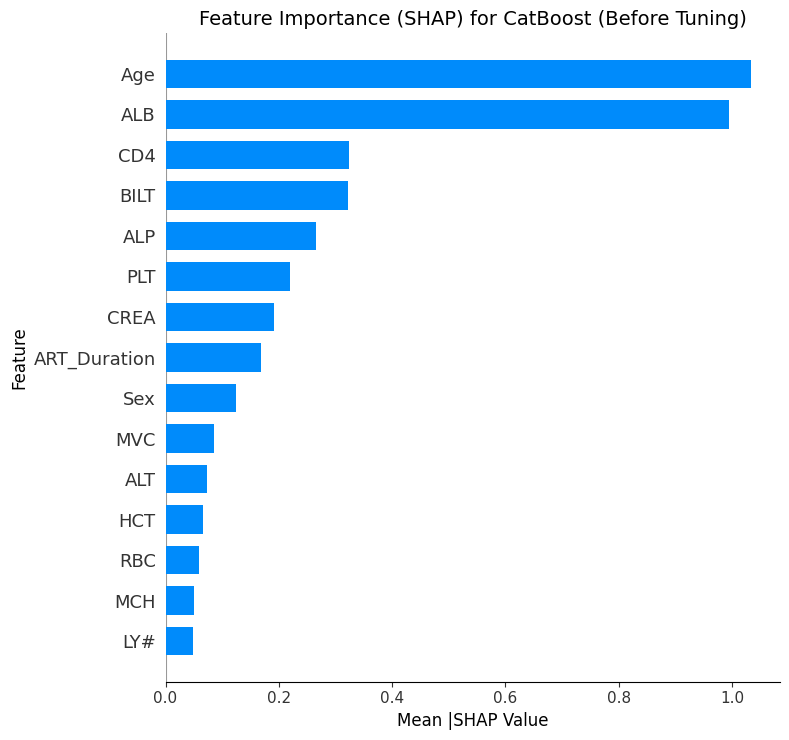

Saved: CatBoost_Before Tuning_SHAP.png


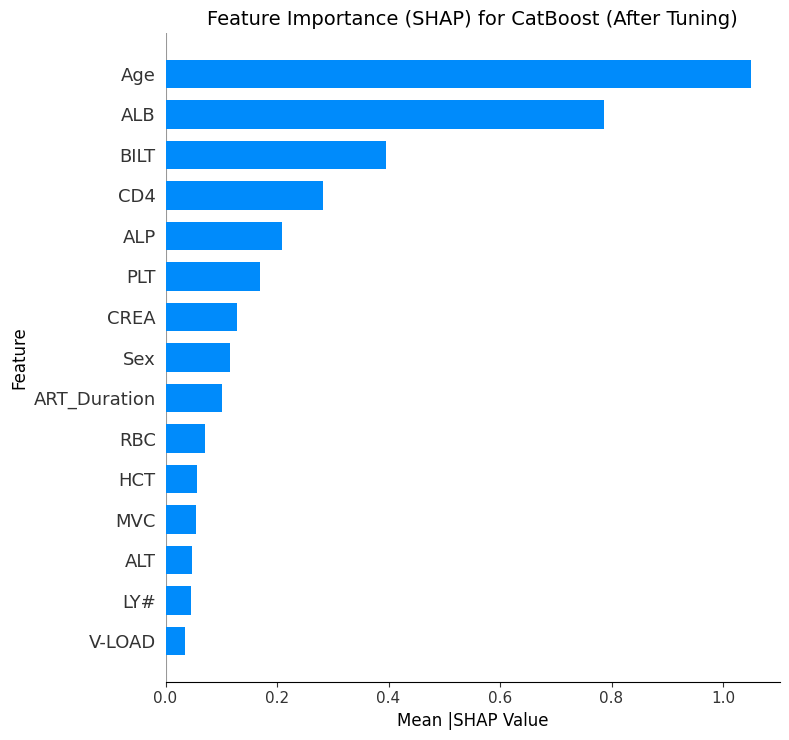

Saved: CatBoost_After Tuning_SHAP.png
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


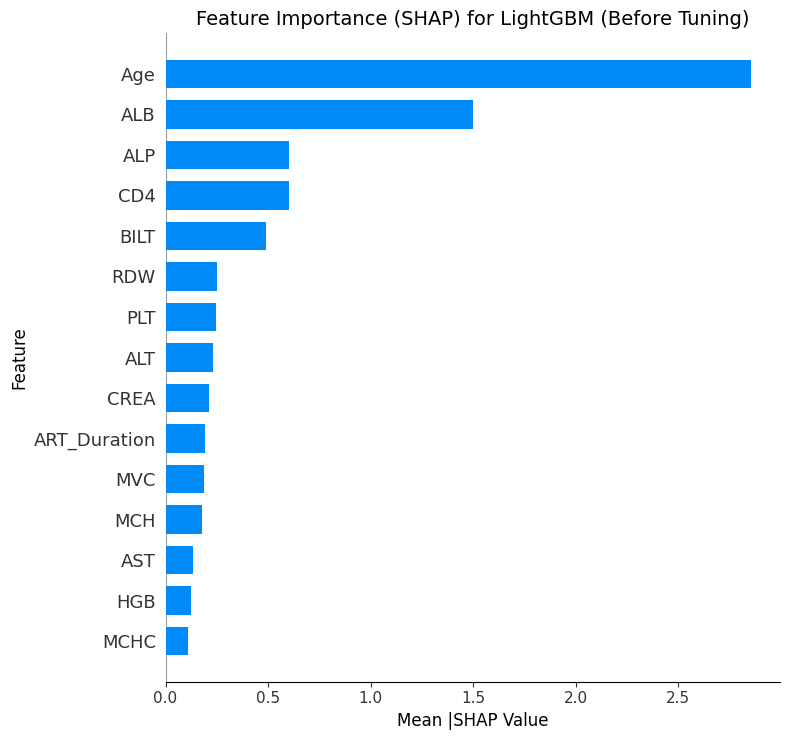

Saved: LightGBM_Before Tuning_SHAP.png
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


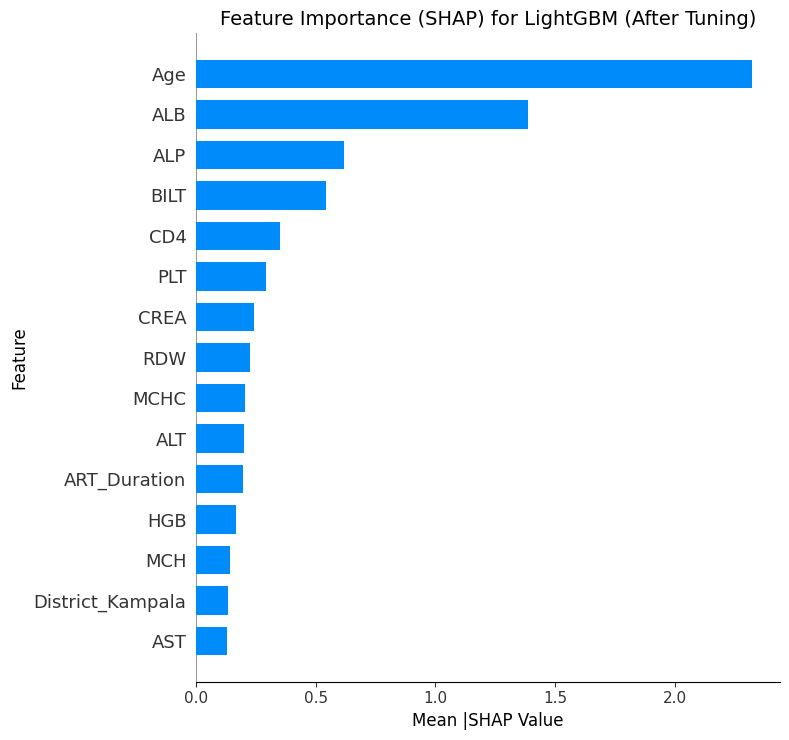

Saved: LightGBM_After Tuning_SHAP.png


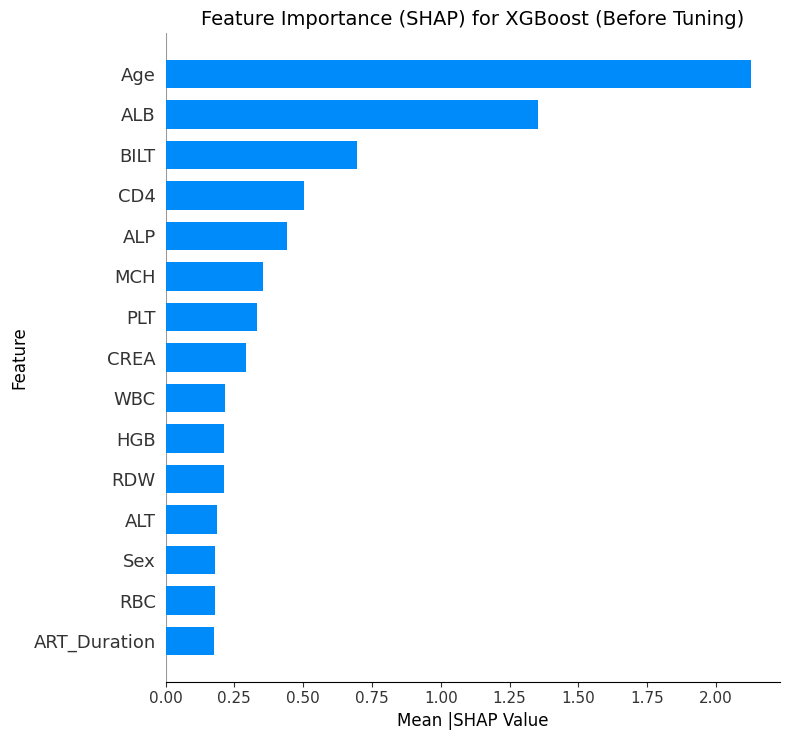

Saved: XGBoost_Before Tuning_SHAP.png


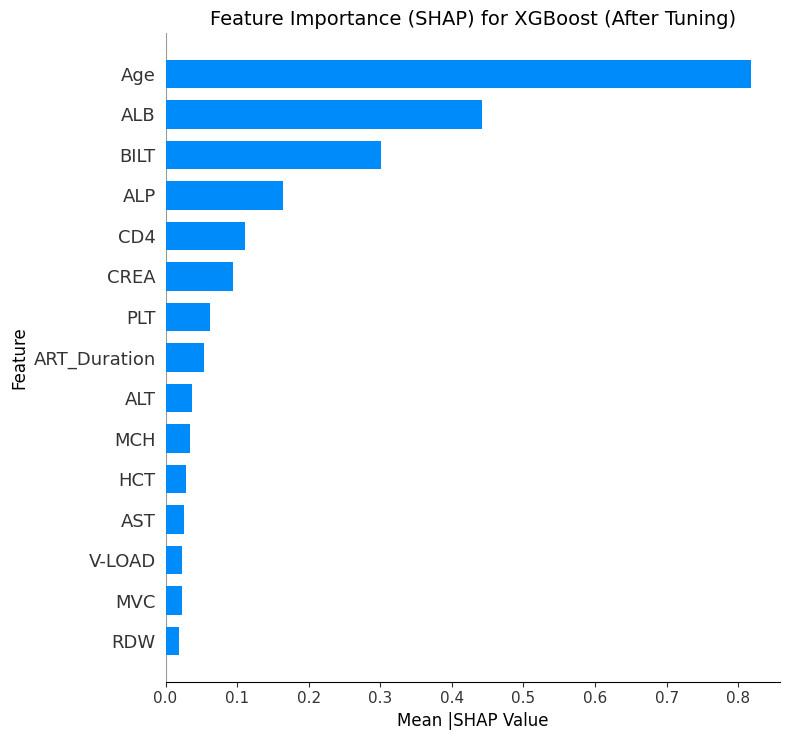

Saved: XGBoost_After Tuning_SHAP.png


In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure scaled DataFrame for SHAP
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

def shap_single_plot(model, X, y, model_name, stage):
    """Generate and save SHAP bar plot for a single model at one stage (before/after tuning)."""
    model.fit(X, y)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # Handle binary classifier case (list output)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False, max_display=15)

    # Add labels and title
    plt.xlabel("Mean |SHAP Value|", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.title(f"Feature Importance (SHAP) for {model_name} ({stage})", fontsize=14)
    plt.tight_layout()

    # Save figure
    filename = f"{model_name}_{stage}_SHAP.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"Saved: {filename}")


# Generate six separate plots
shap_single_plot(models["CatBoost"], X_df, y, "CatBoost", "Before Tuning")
shap_single_plot(tuned_models["CatBoost"], X_df, y, "CatBoost", "After Tuning")

shap_single_plot(models["LightGBM"], X_df, y, "LightGBM", "Before Tuning")
shap_single_plot(tuned_models["LightGBM"], X_df, y, "LightGBM", "After Tuning")

shap_single_plot(models["XGBoost"], X_df, y, "XGBoost", "Before Tuning")
shap_single_plot(tuned_models["XGBoost"], X_df, y, "XGBoost", "After Tuning")


In [138]:
import shap
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Models in order for before and after tuning
plot_order = [
    ("CatBoost", models["CatBoost"], "Before Tuning", "A"),
    ("LightGBM", models["LightGBM"], "Before Tuning", "B"),
    ("XGBoost", models["XGBoost"], "Before Tuning", "C"),
    ("CatBoost", tuned_models["CatBoost"], "After Tuning", "D"),
    ("LightGBM", tuned_models["LightGBM"], "After Tuning", "E"),
    ("XGBoost", tuned_models["XGBoost"], "After Tuning", "F"),
]

with PdfPages("SHAP_Feature_Importance.pdf") as pdf:
    for model_name, model, stage, label in plot_order:
        model.fit(X_df, y)
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_df)

        # Binary classifier case
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

        plt.figure(figsize=(8, 6))
        shap.summary_plot(shap_values, X_df, plot_type="bar", show=False, max_display=15)

        # Labels and title
        plt.xlabel("Mean |SHAP Value|", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.title(f"Feature Importance (SHAP) for {model_name} ({stage})", fontsize=14)

        # Add subplot label (A, B, C, …)
        plt.text(-0.1, 1.05, label, transform=plt.gca().transAxes,
                 fontsize=16, fontweight="bold", va="top")

        plt.tight_layout()
        pdf.savefig(bbox_inches="tight")
        plt.close()

print("✅ Saved all SHAP plots into SHAP_Feature_Importance.pdf")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


✅ Saved all SHAP plots into SHAP_Feature_Importance.pdf


In [146]:
import shap
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Before tuning
before_models = [
    ("CatBoost", models["CatBoost"], "Before Tuning", "A"),
    ("LightGBM", models["LightGBM"], "Before Tuning", "B"),
    ("XGBoost", models["XGBoost"], "Before Tuning", "C"),
]

# After tuning
after_models = [
    ("CatBoost", tuned_models["CatBoost"], "After Tuning", "D"),
    ("LightGBM", tuned_models["LightGBM"], "After Tuning", "E"),
    ("XGBoost", tuned_models["XGBoost"], "After Tuning", "F"),
]

def make_pdf(filename, model_list):
    with PdfPages(filename) as pdf:
        for model_name, model, stage, label in model_list:
            model.fit(X_df, y)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_df)

            # Handle binary classifier SHAP values
            if isinstance(shap_values, list):
                shap_values = shap_values[1]

            plt.figure(figsize=(8, 6))
            shap.summary_plot(shap_values, X_df, plot_type="bar", show=False, max_display=15)

            # Labels and title
            plt.xlabel("Mean | SHAP Value|", fontsize=12)
            plt.ylabel("Feature", fontsize=12)
            plt.title(f"Feature Importance (SHAP) for {model_name} ({stage})", fontsize=14)

            # Add subplot label (A, B, C,D,E,F)
            plt.text(-0.1, 1.05, label, transform=plt.gca().transAxes,
                     fontsize=16, fontweight="bold", va="top")

            plt.tight_layout()
            pdf.savefig(bbox_inches="tight")
            plt.close()

# Generate both PDFs
make_pdf("SHAP_Feature_Importance_Before.pdf", before_models)
make_pdf("SHAP_Feature_Importance_After.pdf", after_models)

print("✅ Saved SHAP plots into two PDFs: SHAP_Feature_Importance_Before.pdf & SHAP_Feature_Importance_After.pdf")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 100, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217865 -> initscore=-1.278152
[LightGBM] [Info] Start training from score -1.278152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\jnabateesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


✅ Saved SHAP plots into two PDFs: SHAP_Feature_Importance_Before.pdf & SHAP_Feature_Importance_After.pdf
